### Importing Data

In [14]:
import pandas as pd
data=pd.read_json(r"C:\Users\laksh\Downloads\fashion_products_data.ldjson",lines=True)
df=pd.DataFrame(data)
df.head(2)

,uniq_id,crawl_timestamp,asin,product_url,product_name,image_urls__small,medium,large,browsenode,brand,...,colour,no__of_reviews,seller_name,seller_id,left_in_stock,no__of_offers,no__of_sellers,technical_details__k_v_pairs,formats___editions,name_of_author_for_books
0,26d41bdc1495de290bc8e6062d927729,2020-02-07 05:11:36 +0000,B07STS2W9T,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968255e+09,LA' Facon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,410c62298852e68f34c35560f2311e5a,2020-02-07 08:45:56 +0000,B07N6TD2WL,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968123e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uniq_id                        30000 non-null  object 
 1   crawl_timestamp                30000 non-null  object 
 2   asin                           30000 non-null  object 
 3   product_url                    30000 non-null  object 
 4   product_name                   30000 non-null  object 
 5   image_urls__small              29998 non-null  object 
 6   medium                         29998 non-null  object 
 7   large                          28841 non-null  object 
 8   browsenode                     29480 non-null  float64
 9   brand                          21857 non-null  object 
 10  sales_price                    27110 non-null  float64
 11  weight                         30000 non-null  object 
 12  rating                         30000 non-null 

In [16]:
df.describe()

,browsenode,sales_price,rating,no__of_reviews,left_in_stock,no__of_offers,no__of_sellers
count,2.948000e+04,27110.000000,30000.000000,3452.000000,3057.000000,1020.000000,1020.000000
mean,2.898248e+09,862.172397,4.039857,136.642236,2.091920,6.230392,6.230392
std,3.050401e+09,964.223008,0.840009,525.484988,1.317071,16.919507,16.919507
min,1.953148e+09,39.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.968067e+09,379.000000,3.500000,4.000000,1.000000,1.000000,1.000000
50%,1.968135e+09,590.000000,4.000000,15.000000,2.000000,2.500000,2.500000
75%,1.968444e+09,899.000000,4.900000,72.000000,3.000000,4.000000,4.000000
max,1.751625e+10,9988.000000,5.000000,9896.000000,5.000000,310.000000,310.000000


In [17]:
df.shape

(30000, 33)

In [18]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'asin', 'product_url', 'product_name',
       'image_urls__small', 'medium', 'large', 'browsenode', 'brand',
       'sales_price', 'weight', 'rating', 'sales_rank_in_parent_category',
       'sales_rank_in_child_category', 'delivery_type', 'meta_keywords',
       'amazon_prime__y_or_n', 'parent___child_category__all',
       'best_seller_tag__y_or_n', 'other_items_customers_buy',
       'product_details__k_v_pairs', 'discount_percentage', 'colour',
       'no__of_reviews', 'seller_name', 'seller_id', 'left_in_stock',
       'no__of_offers', 'no__of_sellers', 'technical_details__k_v_pairs',
       'formats___editions', 'name_of_author_for_books'],
      dtype='object')

In [19]:
# Select only the relevant columns
key_cols= ['asin', 'product_url', 'product_name', 'sales_price', 'rating', 'meta_keywords', 'medium', 'brand']

# Create a new DataFrame with only the relevant columns
df_main = df[key_cols]

# Show the updated DataFrame
df_main.head(2)


,asin,product_url,product_name,sales_price,rating,meta_keywords,medium,brand
0,B07STS2W9T,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...,200.0,5.0,LA' Facon Cotton Kalamkari Handblock Saree Blo...,https://images-na.ssl-images-amazon.com/images...,LA' Facon
1,B07N6TD2WL,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,265.0,3.6,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,https://images-na.ssl-images-amazon.com/images...,NaN


In [20]:
df_main.columns

Index(['asin', 'product_url', 'product_name', 'sales_price', 'rating',
       'meta_keywords', 'medium', 'brand'],
      dtype='object')

In [21]:
print("Missing values count in each key column:")
df_main.isnull().sum()

Missing values count in each key column:


asin                0
product_url         0
product_name        0
sales_price      2890
rating              0
meta_keywords       0
medium              2
brand            8143
dtype: int64

#### Handling Missing values

In [22]:
# Fill missing sales prices with the median price
median_price = df_main['sales_price'].median()
df_main.loc[:, 'sales_price'] = df_main['sales_price'].fillna(median_price)

# Fill missing 'medium' URLs with a placeholder image link
df_main.loc[:, 'medium'] = df_main['medium'].fillna("https://via.placeholder.com/150")

# Fill missing brands with "Unknown"
df_main.loc[:, 'brand'] = df_main['brand'].fillna("Unknown")

# Check the updated missing values count
print("Updated missing values count in each key column after imputation:")
print(df_main.isnull().sum())


Updated missing values count in each key column after imputation:
asin             0
product_url      0
product_name     0
sales_price      0
rating           0
meta_keywords    0
medium           0
brand            0
dtype: int64


### Duplicated values

In [23]:
df_main.duplicated().sum()

0

In [24]:
df['product_name'].head(50)

0     LA' Facon Cotton Kalamkari Handblock Saree Blo...
1     Sf Jeans By Pantaloons Men's Plain Slim fit T-...
2     LOVISTA Cotton Gota Patti Tassel Traditional P...
3              People Men's Printed Regular fit T-Shirt
4     Monte Carlo Grey Solid Cotton Blend Polo Colla...
5     Forest Club | Gym Wear | Sports Shorts| Shorts...
6     PrintOctopus Graphic Printed T-Shirt for Men C...
7       Pepe Jeans Men's Solid Regular fit Casual Shirt
8     Carahere Boys Handmade Pre-Tied Classic Polka ...
9                            Peppermint Synthetic Dress
10    Toddler Little Boy Straight Outta Timeout Long...
11               Puma Unisex Tribal Regular Fit T-Shirt
12    Jevi Prints Women's Cotton Printed Straight Ku...
13    OLLI Men's Orange, Lex Purple, White Cotton Br...
14    Pinkmint Women's Multi-Coloured Digital Print ...
15    Miss Chase Women's Solid Shoulder Cut-Out Half...
16                 bebe Women Genuine Leather Slim Belt
17                      Colt by Unlimited Men's 

#### Outlier detection

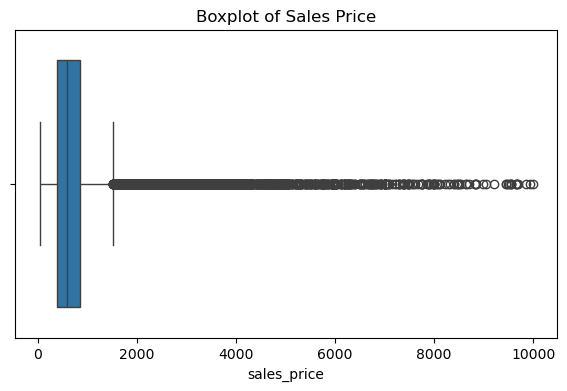

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing sales price distribution
plt.figure(figsize=(7, 4))
sns.boxplot(x=df_main['sales_price'])
plt.title('Boxplot of Sales Price')
plt.show()

#### outlier removal

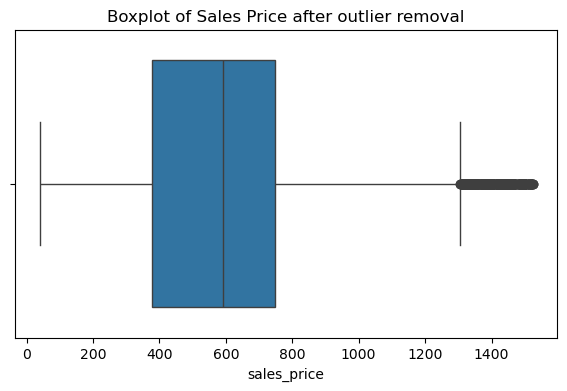

In [26]:
Q1 = df_main['sales_price'].quantile(0.25)
Q3 = df_main['sales_price'].quantile(0.75)
IQR = Q3 - Q1
df_main = df_main[(df_main['sales_price'] >= (Q1 - 1.5 * IQR)) & (df_main['sales_price'] <= (Q3 + 1.5 * IQR))]
# Visualizing sales price distribution
plt.figure(figsize=(7, 4))
sns.boxplot(x=df_main['sales_price'])
plt.title('Boxplot of Sales Price after outlier removal')
plt.show()

#### Sales Price Distribution

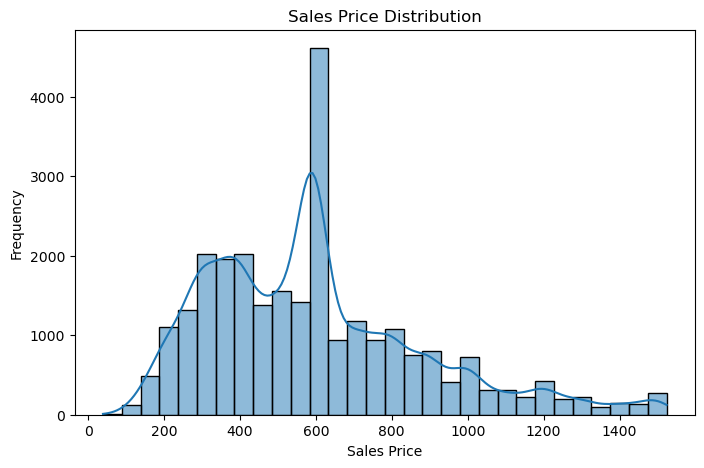

In [27]:
# Sales Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_main['sales_price'], bins=30, kde=True)
plt.title('Sales Price Distribution')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.show()


#### Top 10 Brands by Product Count

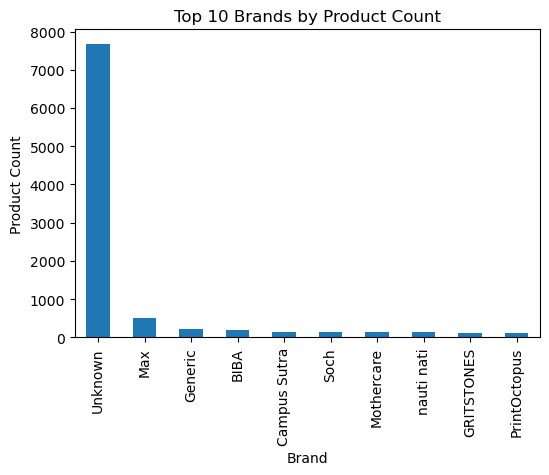

In [28]:
# Brand Distribution
plt.figure(figsize=(6,4))
top_brands = df_main['brand'].value_counts().head(10)
top_brands.plot(kind='bar')
plt.title('Top 10 Brands by Product Count')
plt.xlabel('Brand')
plt.ylabel('Product Count')
plt.show()


#### Sales Price vs Rating

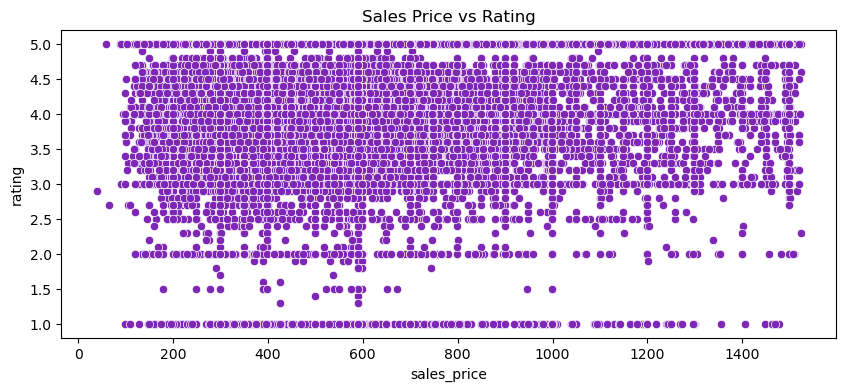

In [29]:
# Rating vs Sales Price
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df_main, x='sales_price', y='rating',color="#7E27B7")
plt.title("Sales Price vs Rating")
plt.show()

#### Sales Price Distribution by Brand

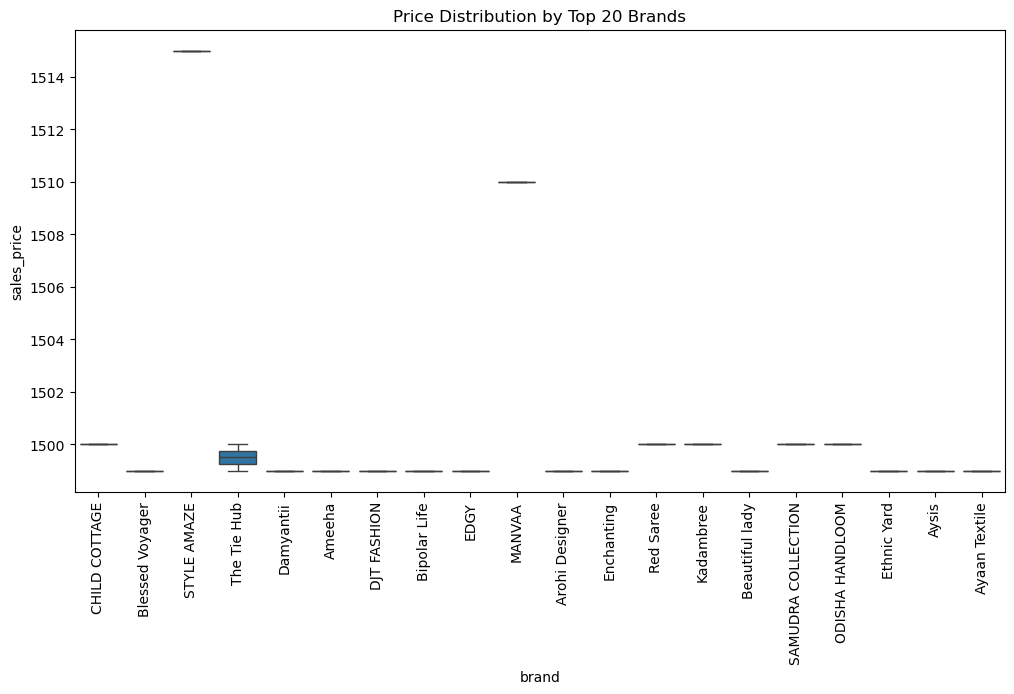

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 20 brands by average sales price
top_20_brands = df_main.groupby('brand')['sales_price'].mean().nlargest(20).index
df_top_20 = df_main[df_main['brand'].isin(top_20_brands)]

# Plotting the boxplot for top 20 brands
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_20, x='brand', y='sales_price')
plt.xticks(rotation=90)
plt.title("Price Distribution by Top 20 Brands")
plt.show()


#### Distribution of Product Ratings

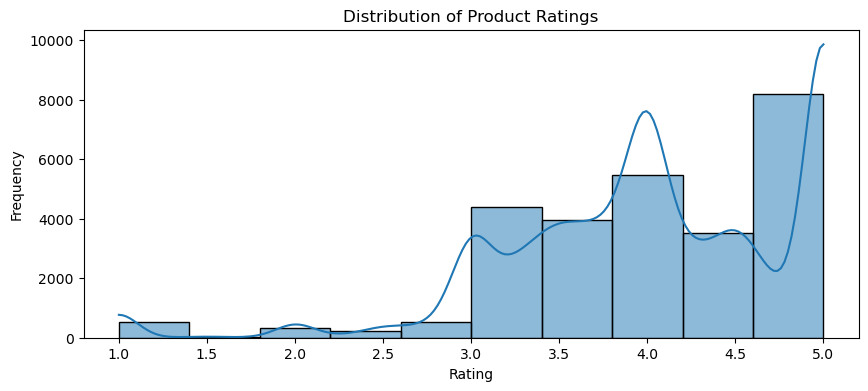

In [31]:
plt.figure(figsize=(10, 4))
sns.histplot(df_main['rating'], bins=10, kde=True)
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

#### Plotting the top 10 products by price

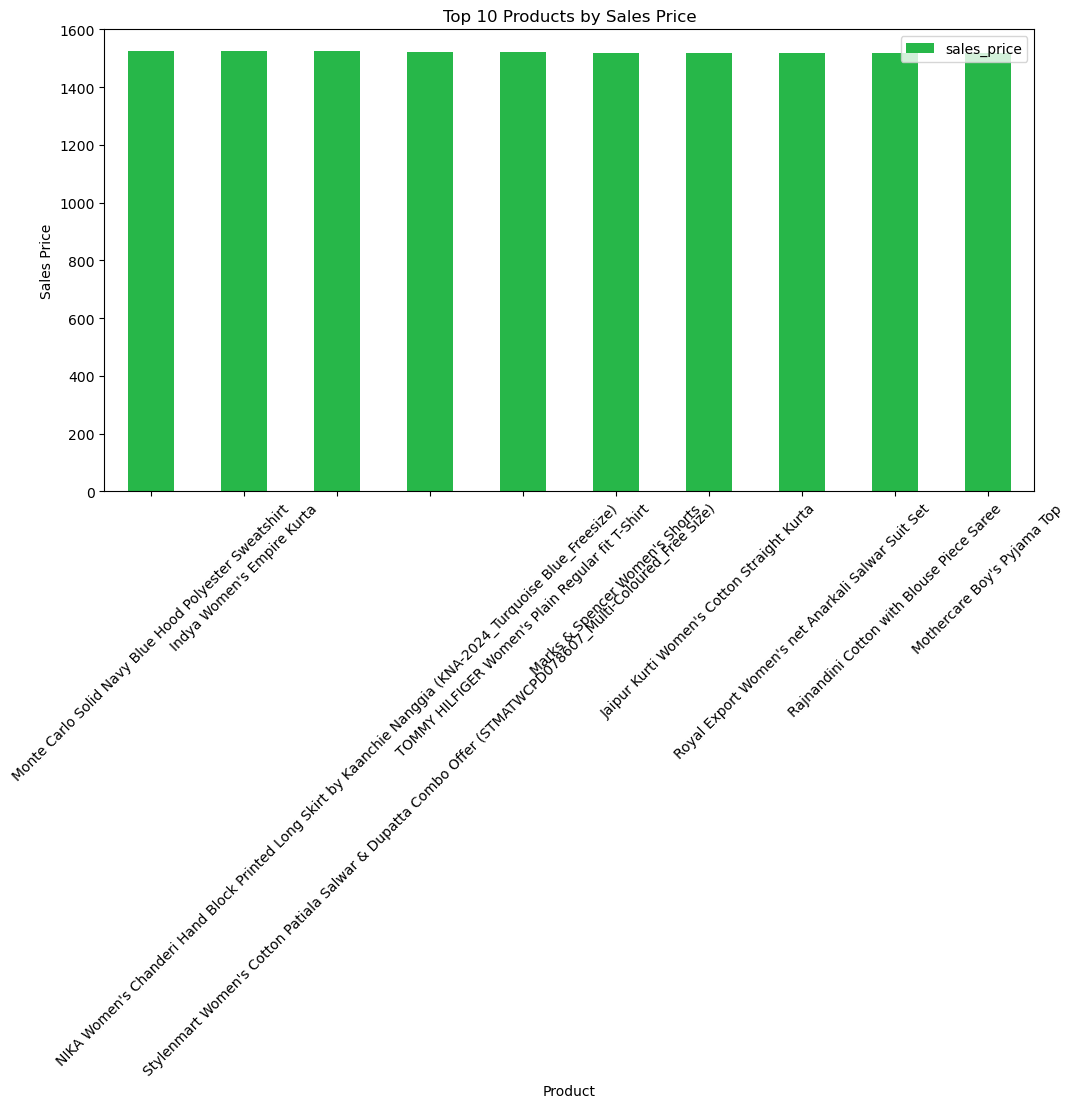

In [32]:
# Sorting by 'sales_price' and selecting top 10 products
df_top_products = df_main.sort_values('sales_price', ascending=False).head(10)

# Plotting the top 10 products by price
df_top_products.plot(kind='bar', x='product_name', y='sales_price', figsize=(12, 6), color='#27B749')
plt.title("Top 10 Products by Sales Price")
plt.xlabel('Product')
plt.ylabel('Sales Price')
plt.xticks(rotation=45)
plt.show()


#### Plotting the top 10 rated products

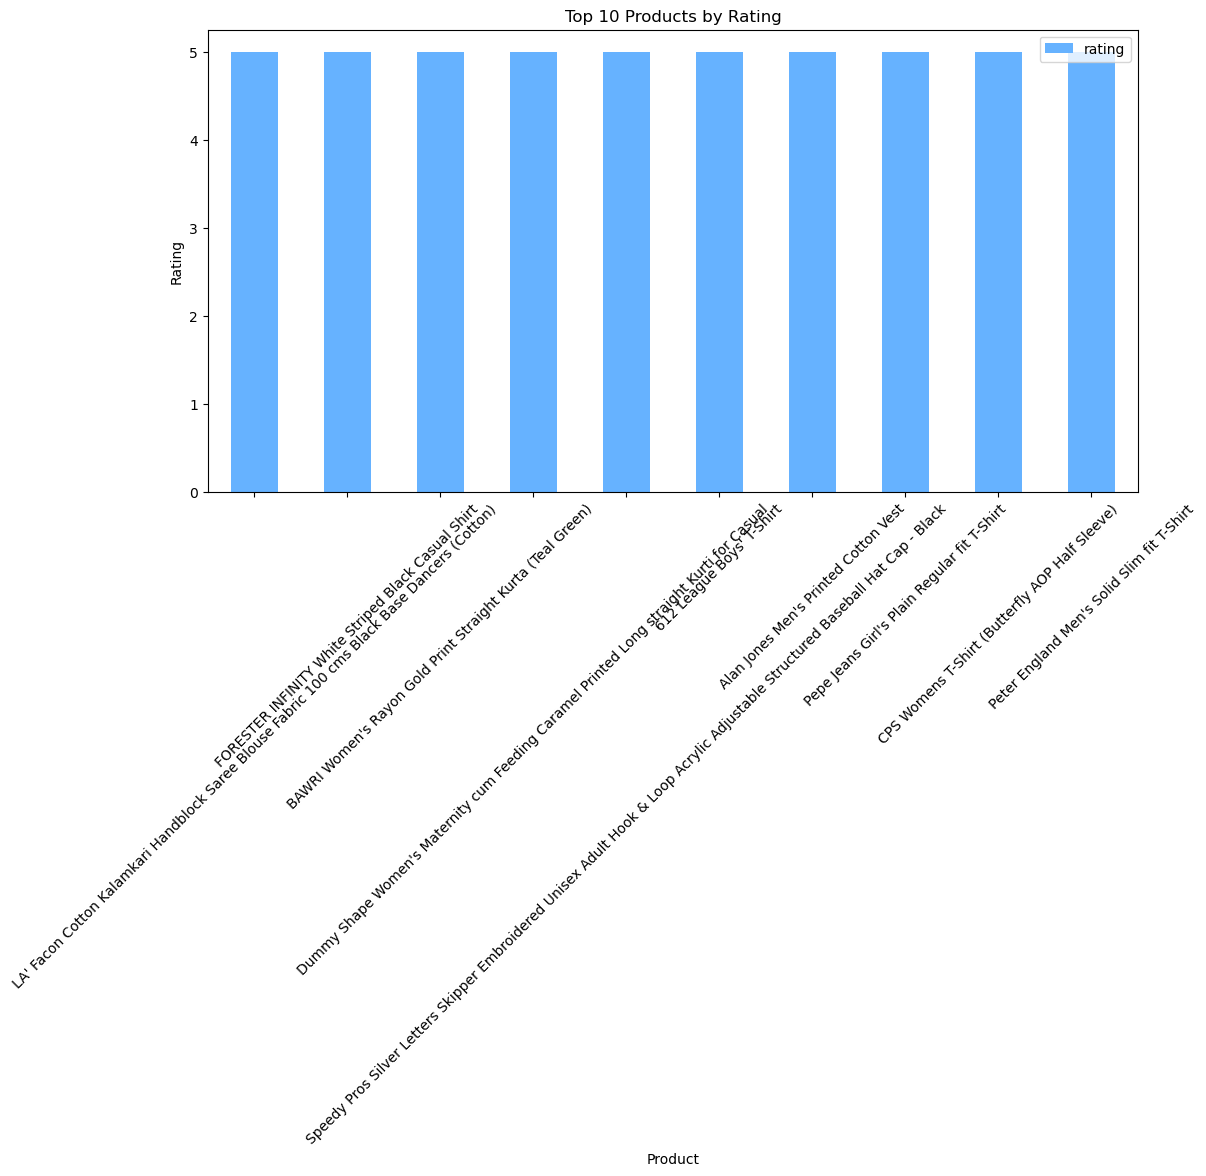

In [33]:
# Sorting by 'rating' and selecting top 10 products
df_top_rated = df_main.sort_values('rating', ascending=False).head(10)

# Plotting the top 10 rated products
df_top_rated.plot(kind='bar', x='product_name', y='rating', figsize=(12, 6), color='#66B2FF')
plt.title("Top 10 Products by Rating")
plt.xlabel('Product')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


#### Top 10 Brands by Average Sales Price and Rating

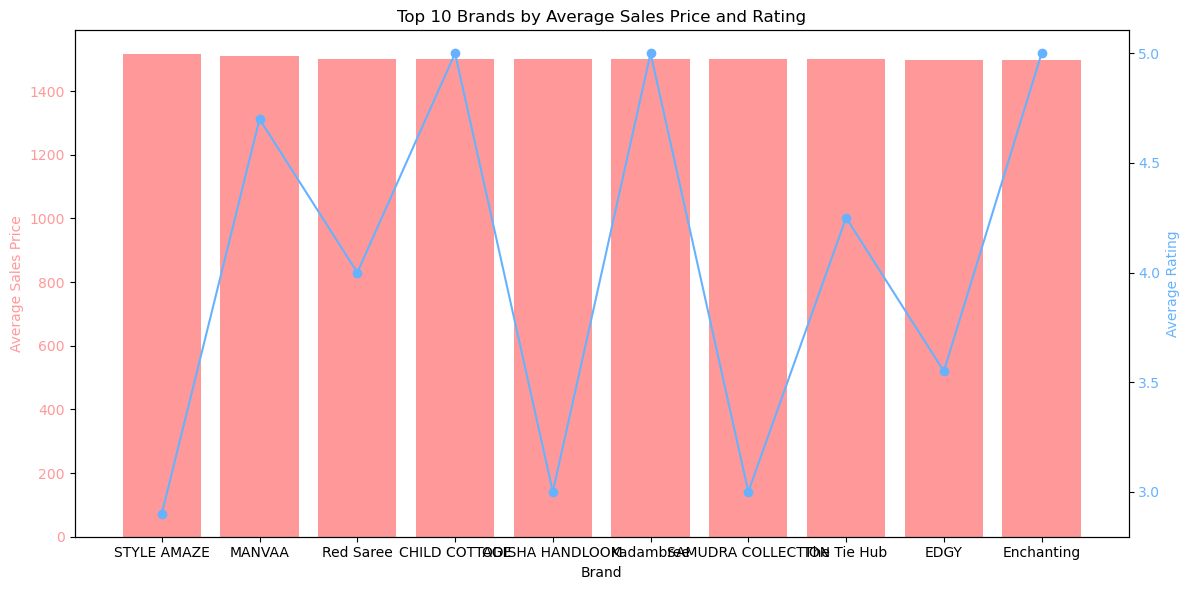

In [34]:
# Group by 'brand' and calculate the average 'sales_price' and 'rating'
df_brand_price_rating = df_main.groupby('brand').agg({'sales_price': 'mean', 'rating': 'mean'}).sort_values('sales_price', ascending=False).head(10)

# Plotting the results with two y-axes for better visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting sales price on the left y-axis
ax1.bar(df_brand_price_rating.index, df_brand_price_rating['sales_price'], color='#FF9999', label='Sales Price')
ax1.set_xlabel('Brand')
ax1.set_ylabel('Average Sales Price', color='#FF9999')
ax1.tick_params(axis='y', labelcolor='#FF9999')

# Create a second y-axis to plot the rating
ax2 = ax1.twinx()
ax2.plot(df_brand_price_rating.index, df_brand_price_rating['rating'], color='#66B2FF', marker='o', label='Rating')
ax2.set_ylabel('Average Rating', color='#66B2FF')
ax2.tick_params(axis='y', labelcolor='#66B2FF')

# Title and layout
plt.title("Top 10 Brands by Average Sales Price and Rating")
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

#### Heatmap of Average Sales Price and Rating by Brand

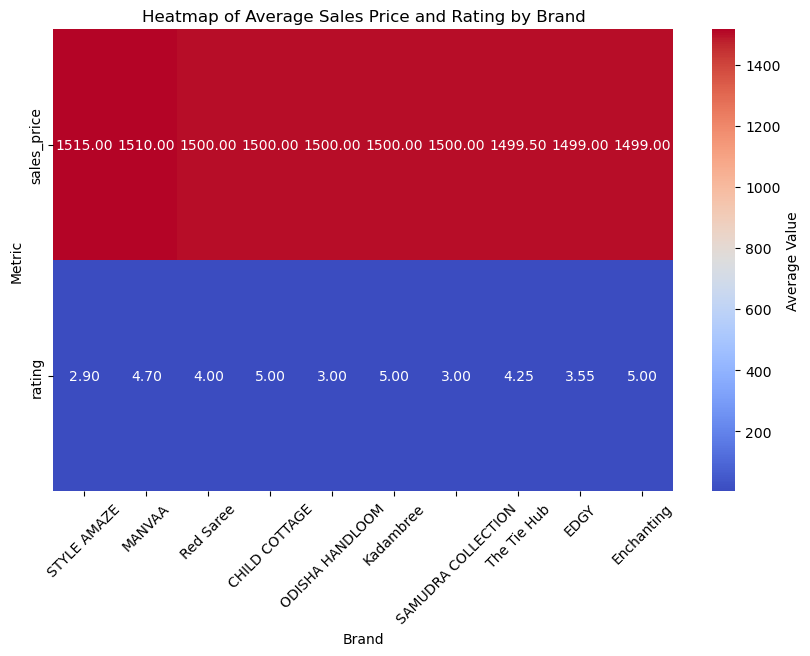

In [35]:
# Group by 'brand' and calculate the average 'sales_price' and 'rating'
df_brand_price_rating = df_main.groupby('brand').agg({'sales_price': 'mean', 'rating': 'mean'}).sort_values('sales_price', ascending=False).head(10)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_brand_price_rating.T, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Average Value'})
plt.title('Heatmap of Average Sales Price and Rating by Brand')
plt.xlabel('Brand')
plt.ylabel('Metric')
plt.xticks(rotation=45)
plt.show()

#### Plotting a heatmap for correlation between numerical columns

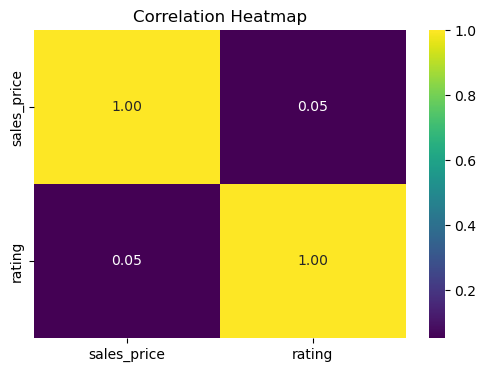

In [36]:
# Plotting a heatmap for correlation between numerical columns
plt.figure(figsize=(6,4))
sns.heatmap(df_main[['sales_price', 'rating']].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#### Violin plot

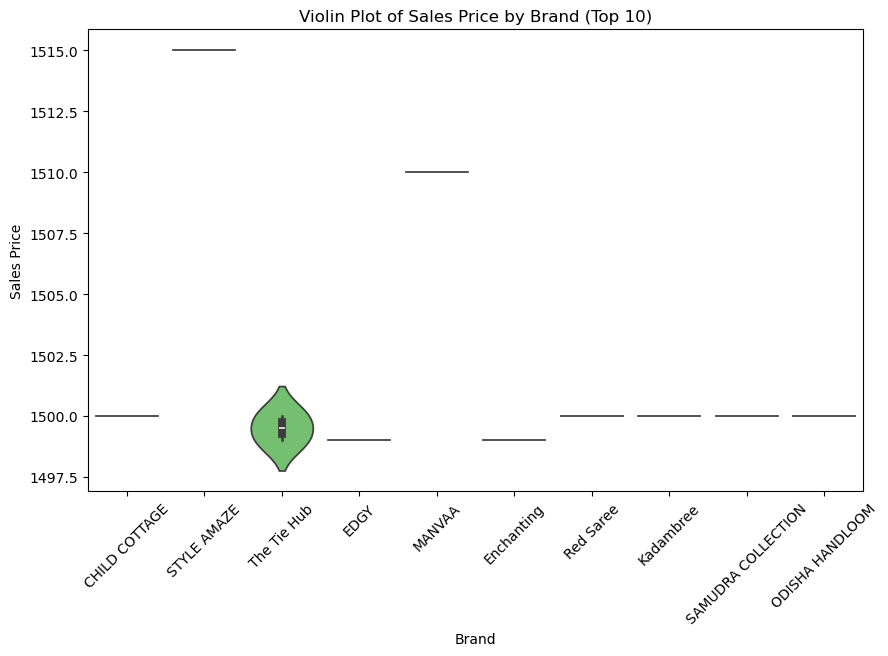

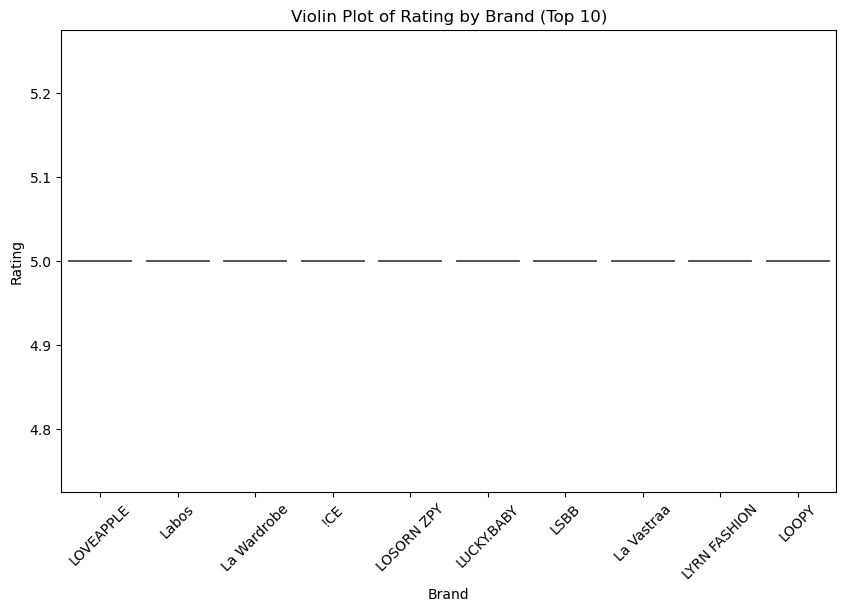

In [37]:

# Get top 10 brands based on average sales_price
top_10_brands_sales = df_main.groupby('brand')['sales_price'].mean().sort_values(ascending=False).head(10).index
df_top_10_sales = df_main[df_main['brand'].isin(top_10_brands_sales)]

# Violin plot for 'sales_price' by 'brand' for top 10 brands
plt.figure(figsize=(10, 6))
sns.violinplot(x='brand', y='sales_price', data=df_top_10_sales, hue='brand', palette='muted', legend=False)
plt.title('Violin Plot of Sales Price by Brand (Top 10)')
plt.xlabel('Brand')
plt.ylabel('Sales Price')
plt.xticks(rotation=45)
plt.show()

# Get top 10 brands based on average rating
top_10_brands_rating = df_main.groupby('brand')['rating'].mean().sort_values(ascending=False).head(10).index
df_top_10_rating = df_main[df_main['brand'].isin(top_10_brands_rating)]

# Violin plot for 'rating' by 'brand' for top 10 brands
plt.figure(figsize=(10, 6))
sns.violinplot(x='brand', y='rating', data=df_top_10_rating, hue='brand', palette='muted', legend=False)
plt.title('Violin Plot of Rating by Brand (Top 10)')
plt.xlabel('Brand')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

#### Pair plot for 'sales_price', 'rating'

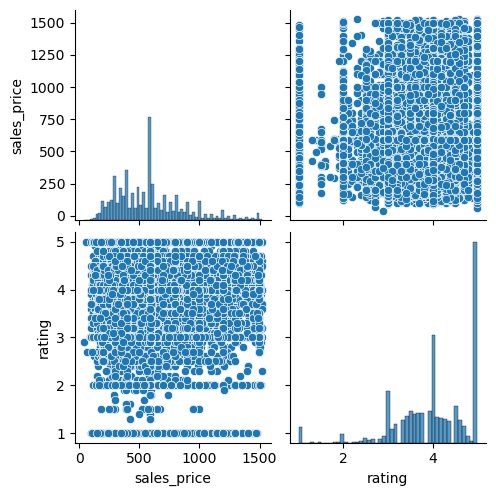

In [38]:
# Pair plot for 'sales_price', 'rating', and other numerical variables
sns.pairplot(df_main[['sales_price', 'rating']])
plt.show()


#### Correlation matrix between numerical columns (e.g., 'sales_price' and 'rating')

In [39]:
# Correlation matrix between numerical columns (e.g., 'sales_price' and 'rating')
correlation_matrix = df_main[['sales_price', 'rating']].corr()
print(correlation_matrix)


             sales_price    rating
sales_price     1.000000  0.053052
rating          0.053052  1.000000


###  Remove Stopwords and Special Characters from product_name

In [40]:
import nltk
from nltk.corpus import stopwords
import re

# Download stopwords if you haven't already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define function to clean product names
def clean_product_name(name):
    name = re.sub(r'[^\w\s]', '', name)  # Remove punctuation
    name = ' '.join([word for word in name.split() if word.lower() not in stop_words])  # Remove stopwords
    return name

# Apply the function to the product_name column
df_main['product_name'] = df_main['product_name'].apply(clean_product_name)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Remove Non-English Words

In [41]:
pip install langdetect


Note: you may need to restart the kernel to use updated packages.


In [42]:
# from langdetect import detect, LangDetectException

# # Filter non-English product names safely
# def detect_language(text):
#     try:
#         # Ensure text is not null or too short
#         if text and len(text.strip()) > 5:  # Only check text longer than 5 characters
#             return detect(text) == 'en'
#         return False
#     except LangDetectException:
#         return False

# # Apply the function
# df_main = df_main[df_main['product_name'].apply(detect_language)]


### Converting short forms to their corresponding long forms

In [43]:
import re

# Dictionary of common short forms and their corresponding long forms
abbreviations = {
    "TShirt": "T-Shirt",
    "Unisex": "Unisex Clothing",
    "Mens": "Men's",
    "Womens": "Women's",
    "Gym Wear": "Gym Wear Clothing",
    "Casual": "Casual Wear",
    "Fit": "Fitted",
    "Reg": "Regular",
    "Polo": "Polo Shirt",
    "Shirt": "Shirt",
    "S/S": "Short Sleeve",
    "L/S": "Long Sleeve",
    "Belt": "Belt Accessory"
}

# Function to replace abbreviations with long forms
def replace_abbreviations(product_name):
    for short, long in abbreviations.items():
        # Using regex to replace words only if they match exactly (case-insensitive)
        product_name = re.sub(rf'\b{short}\b', long, product_name, flags=re.IGNORECASE)
    return product_name

# Apply the function to the 'product_name' column
df_main['product_name'] = df_main['product_name'].apply(replace_abbreviations)

# Display the updated product names to confirm changes
print(df_main['product_name'].head(10))


0     LA Facon Cotton Kalamkari Handblock Saree Blou...
1     Sf Jeans Pantaloons Men's Plain Slim Fitted T-...
2     LOVISTA Cotton Gota Patti Tassel Traditional P...
3           People Men's Printed Regular Fitted T-Shirt
5     Forest Club Gym Wear Clothing Sports Shorts Sh...
6     PrintOctopus Graphic Printed T-Shirt Men Chill...
7     Pepe Jeans Men's Solid Regular Fitted Casual W...
8     Carahere Boys Handmade PreTied Classic Polka D...
9                            Peppermint Synthetic Dress
10    Toddler Little Boy Straight Outta Timeout Long...
Name: product_name, dtype: object


In [44]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('punkt')  # Download the punkt tokenizer data

stemmer = PorterStemmer()

def stem_text(text):
    words = word_tokenize(text)  # Tokenize text into words
    stemmed_words = [stemmer.stem(word) for word in words]  # Apply stemming
    return ' '.join(stemmed_words)

# Apply the function to the product_name column
df_main['product_name'] = df_main['product_name'].apply(stem_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Sample words
words = [("running", wordnet.VERB), ("jumps", wordnet.NOUN), ("easily", wordnet.ADV), ("fairly", wordnet.ADV)]

# Apply lemmatization
lemmatized_words = [lemmatizer.lemmatize(word, pos=pos) for word, pos in words]
print("Lemmatized Words:", lemmatized_words)


Lemmatized Words: ['run', 'jump', 'easily', 'fairly']


In [48]:
df_main.head(1)

,asin,product_url,product_name,sales_price,rating,meta_keywords,medium,brand
0,B07STS2W9T,https://www.amazon.in/Facon-Kalamkari-Handbloc...,la facon cotton kalamkari handblock sare blous...,200.0,5.0,LA' Facon Cotton Kalamkari Handblock Saree Blo...,https://images-na.ssl-images-amazon.com/images...,LA' Facon


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Example product names 
product_names = df_main['product_name'].tolist()

# Vectorize product names using Bag of Words
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(product_names)
print(bow_matrix.shape)

(27169, 15270)


Recommended Product: winza design chiffon sare blous piec


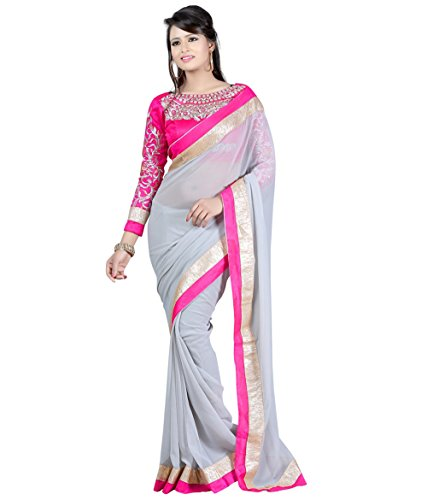

Recommended Product: winza design chiffon sare blous piec


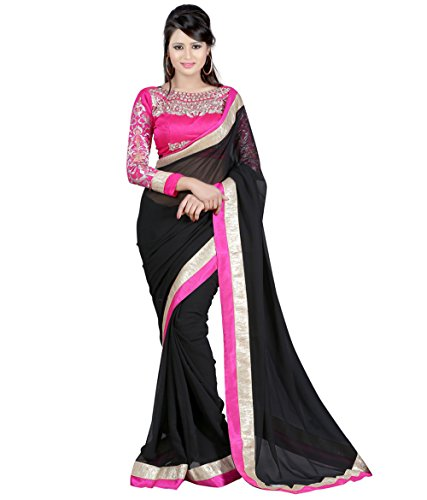

Recommended Product: winza design georgett sare blous piec


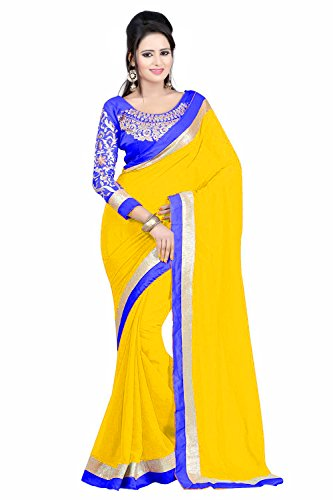

Recommended Product: winza design cotton sare blous piec


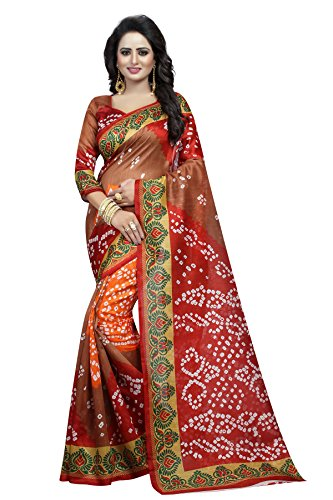

Recommended Product: winza design cotton sare blous piec


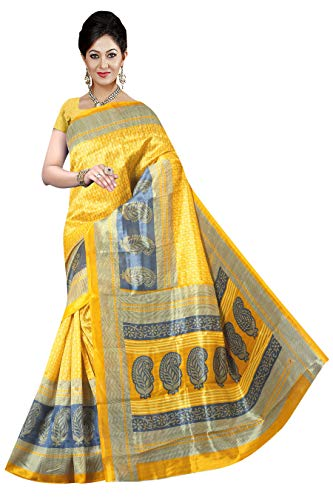

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
from IPython.display import Image, display
import requests

def recommend_products(asin, num_products, vectors, df):
    """
    Recommends similar products based on Bag of Words cosine similarity.

    Args:
        asin (str): The ASIN of the product for which recommendations are to be made.
        num_products (int): Number of recommended products.
        vectors (array): Transformed Bag of Words vectors for all products.
        df (DataFrame): DataFrame containing product data with columns 'asin' and 'medium'.

    Returns:
        None: Displays recommended product images.
    """
    try:
        # Find the index of the given ASIN
        product_index = df[df['asin'] == asin].index[0]
    except IndexError:
        print(f"ASIN {asin} not found in the dataset.")
        return

    # Compute cosine similarity between the given product and all others
    distances = pairwise_distances(vectors, vectors[product_index], metric='cosine').flatten()

    # Get indices of the top recommendations, excluding the given product itself
    recommended_indices = distances.argsort()[1:num_products + 1]

    # Display recommended product information and images
    for idx in recommended_indices:
        product_name = df.iloc[idx]['product_name']
        image_url = df.iloc[idx]['medium']

        try:
            # Skip empty or invalid URLs
            if not image_url or not image_url.startswith(('http://', 'https://')):
                print(f"No valid image URL for: {product_name}")
                continue

            # Check URL accessibility
            response = requests.get(image_url, stream=True)
            if response.status_code == 200 and 'image' in response.headers.get('Content-Type', ''):
                print(f"Recommended Product: {product_name}")
                display(Image(image_url))
            else:
                print(f"Image not available for: {product_name}")
        except Exception as e:
            print(f"Error displaying image for {product_name}: {e}")

# Example usage:
# Assuming 'df_main' is your DataFrame and 'product_name' is the text data
vectorizer = CountVectorizer()
bow_vectors = vectorizer.fit_transform(df_main['product_name'])

# Call the recommendation function using 'asin' as the identifier
recommend_products(asin='B07K6PHHHM', num_products=5, vectors=bow_vectors, df=df_main)


In [51]:
df_main['asin'].head(3)

0    B07STS2W9T
1    B07N6TD2WL
2    B07WJ6WPN1
Name: asin, dtype: object

In [52]:
print(df_main.columns)


Index(['asin', 'product_url', 'product_name', 'sales_price', 'rating',
       'meta_keywords', 'medium', 'brand'],
      dtype='object')


Recommendations for Product ASIN: B07DWG6KYY

Recommended Product ASIN: B083QQK18K
Product Name: jevi print women 's cotton straight kurta
Product URL: https://www.amazon.in/Jevi-Prints-Womens-Straight-Kurti_K-1312_XXL_Beige_Xx-Large/dp/B07L5MDN7N/
Similarity Score: 0.29


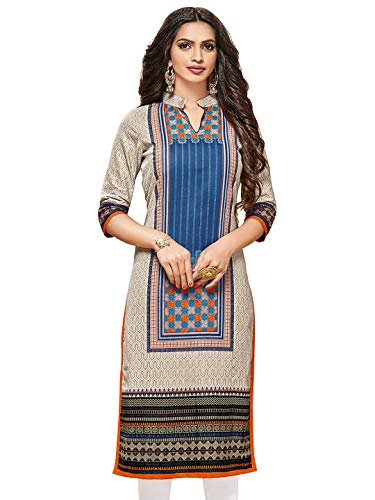


Recommended Product ASIN: B083QGM3CS
Product Name: jevi print women 's cotton straight kurta
Product URL: https://www.amazon.in/Jevi-Prints-Straight-KURTI_S-1717_40_Pink-Grey_40/dp/B07L9D4KZ1/
Similarity Score: 0.29


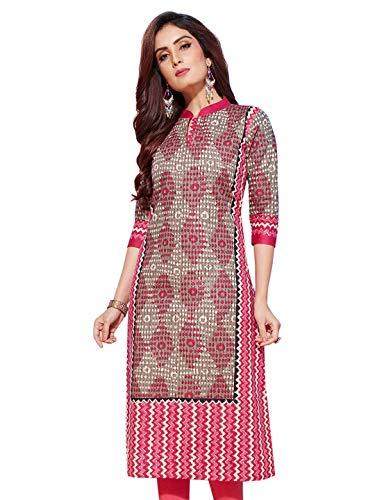


Recommended Product ASIN: B083QMR6BG
Product Name: jevi print women 's cotton print straight kurta prj614
Product URL: https://www.amazon.in/Jevi-Prints-Womens-Straight-PRJ-614_XXL/dp/B07F1RLLVT/
Similarity Score: 0.46


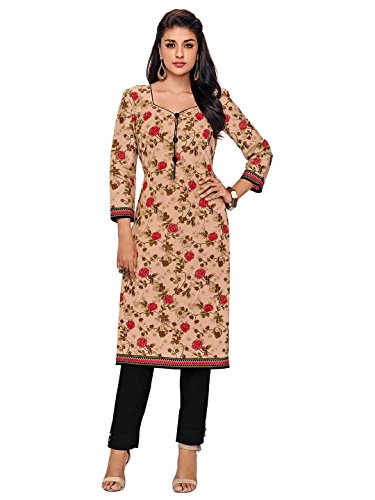


Recommended Product ASIN: B075V9DCH1
Product Name: jevi print women 's cotton dress materi
Product URL: https://www.amazon.in/Jevi-Prints-Material-Saheli-1216-1505-1530_Free-Size_Multi-Coloured/dp/B075V9DCH1/
Similarity Score: 0.49


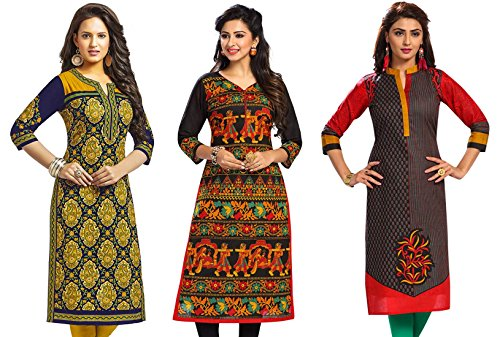

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
import numpy as np
from IPython.display import Image, display

# Function to recommend similar products
def recommend_products(asin, num_recommendations, product_vectors, df):
    """
    Recommend similar products based on pairwise distance.
    
    Args:
        asin (str): The ASIN of the product to find recommendations for.
        num_recommendations (int): The number of similar products to recommend.
        product_vectors (ndarray): The TF-IDF vectors of the products.
        df (DataFrame): The DataFrame containing product data.
        
    Returns:
        None: Displays recommended product names and images.
    """
    # Ensure ASIN exists in the dataset
    if asin not in df['asin'].values:
        print(f"ASIN {asin} not found.")
        return []

    # Get the index of the product with the given ASIN
    product_index = df[df['asin'] == asin].index[0]

    # Get the vector for the specified product
    product_vector = product_vectors[product_index]

    # Compute pairwise distances with all products
    distances = pairwise_distances([product_vector], product_vectors, metric='cosine').flatten()

    # Get the top N most similar products, excluding the product itself
    similar_indices = np.argsort(distances)[1:num_recommendations + 1]

    # Display the recommended products
    print(f"Recommendations for Product ASIN: {asin}")
    for idx in similar_indices:
        recommended_asin = df.iloc[idx]['asin']
        product_name = df.iloc[idx]['product_name']
        product_url = df.iloc[idx]['product_url']
        image_url = df.iloc[idx]['medium']  # Image URL from the 'medium' column
        similarity_score = distances[idx]

        # Print the recommendation
        print(f"\nRecommended Product ASIN: {recommended_asin}")
        print(f"Product Name: {product_name}")
        print(f"Product URL: {product_url}")
        print(f"Similarity Score: {similarity_score:.2f}")
        try:
            display(Image(image_url))  # Display the image from the 'medium' column
        except Exception as e:
            print(f"Error displaying image for ASIN {recommended_asin}: {e}")


# Example usage
# Step 1: Create a TF-IDF vectorizer and transform product names
vectorizer = TfidfVectorizer()
product_vectors = vectorizer.fit_transform(df_main['product_name']).toarray()

# Step 2: Specify the ASIN and the number of recommendations
asin = 'B07DWG6KYY'  # Example ASIN
num_recommendations = 4

# Step 3: Get recommendations
recommend_products(asin, num_recommendations, product_vectors, df_main)


In [54]:
pip install scipy==1.11.4


Note: you may need to restart the kernel to use updated packages.


In [55]:
df_main['asin'].head(10)

0     B07STS2W9T
1     B07N6TD2WL
2     B07WJ6WPN1
3     B07PYSF4WZ
5     B07X5M41BJ
6     B07H9RCVHQ
7     B07PJ5QWZ3
8     B01D6VFN7O
9     B07P43X53C
10    B01BYJKPCS
Name: asin, dtype: object

Recommendations for Product ASIN: B01D6VFN7O

Recommended Product ASIN: B07P56XHM3
Product Name: peppermint synthet dress
Product URL: https://www.amazon.in/Peppermint-Synthetic-line-Dress-L-RF-DRS-1192-9012_Offwhite_5-6/dp/B07NBNRZS9/
Similarity Score: 0.00


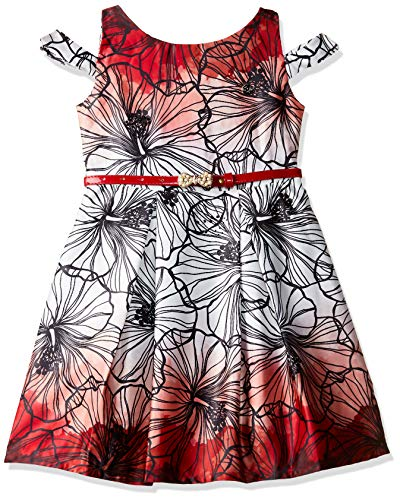


Recommended Product ASIN: B07P6DH68C
Product Name: peppermint synthet dress
Product URL: https://www.amazon.in/Peppermint-Synthetic-line-L-RF-DRS-1192-8967_Navy-Blue_8-9/dp/B07NBPY7DF/
Similarity Score: 0.00


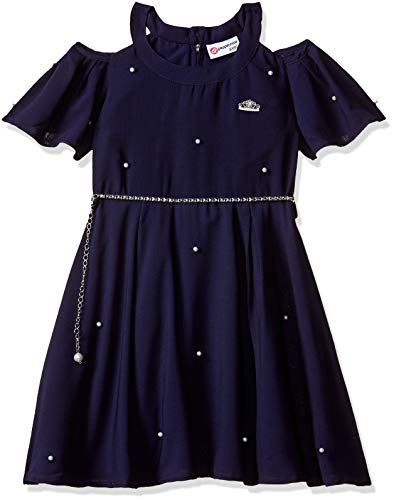


Recommended Product ASIN: B07P7JD6LT
Product Name: peppermint synthet dress
Product URL: https://www.amazon.in/Peppermint-Synthetic-line-Dress-L-MB-DRS-2181-8524_Red_2-3/dp/B07KT4N15N/
Similarity Score: 0.00


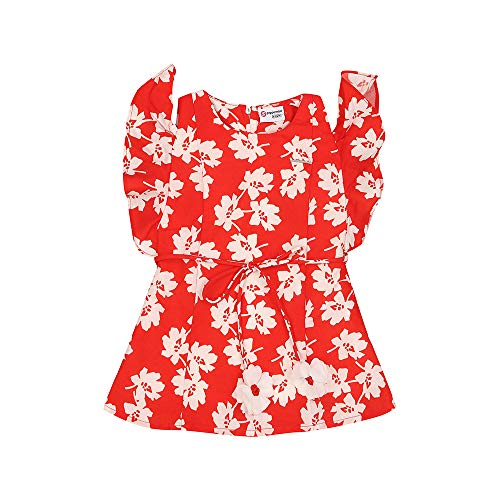


Recommended Product ASIN: B07P5FC9ZV
Product Name: peppermint synthet dress
Product URL: https://www.amazon.in/Peppermint-Synthetic-line-Dress-L-RF-DRS-1192-9157_Offwhite_10-11/dp/B07NBRYPRX/
Similarity Score: 0.00


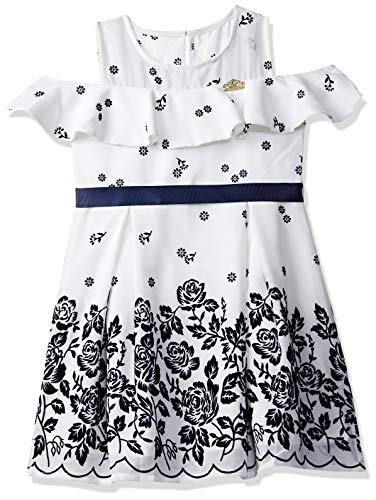


Recommended Product ASIN: B07P43X53C
Product Name: peppermint synthet dress
Product URL: https://www.amazon.in/Peppermint-Synthetic-line-Dress-L-RF-DRS-1192-9098_Offwhite_4-5/dp/B07NBQFWDC/
Similarity Score: 0.00


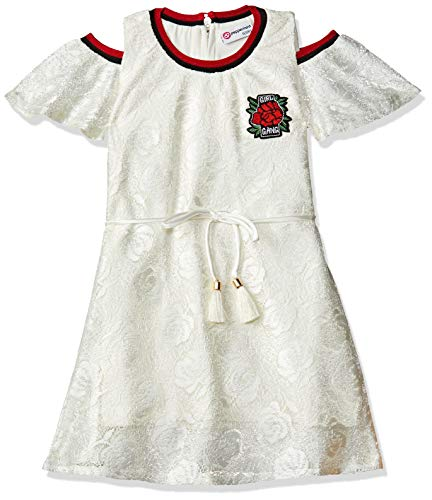

In [56]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics import pairwise_distances
from IPython.display import Image, display

# Function to compute product vectors with error handling
def compute_product_vectors(model, product_names):
    """
    Computes vectors for a list of product names using a Word2Vec model.

    Args:
        model (Word2Vec): Trained Word2Vec model.
        product_names (list of str): List of product names.

    Returns:
        ndarray: An array of product vectors.
    """
    vectors = []
    for product_name in product_names:
        words = product_name.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:  # Only calculate mean if there are valid word vectors
            vectors.append(np.mean(word_vectors, axis=0))
        else:  # Handle products with no valid words
            vectors.append(np.zeros(model.vector_size))
    return np.array(vectors)

# Step 1: Train the Word2Vec model
sentences = [product_name.split() for product_name in df_main['product_name']]
model = Word2Vec(sentences, vector_size=100, min_count=1)

# Step 2: Compute product vectors
product_vectors = compute_product_vectors(model, df_main['product_name'])

# Function to recommend similar products
def recommend_products(asin, num_recommendations, product_vectors, df):
    if asin not in df['asin'].values:
        print(f"ASIN {asin} not found.")
        return []

    product_index = df[df['asin'] == asin].index[0]
    product_vector = product_vectors[product_index]
    distances = pairwise_distances([product_vector], product_vectors, metric='cosine').flatten()
    similar_indices = np.argsort(distances)[1:num_recommendations + 1]

    print(f"Recommendations for Product ASIN: {asin}")
    for idx in similar_indices:
        recommended_asin = df.iloc[idx]['asin']
        product_name = df.iloc[idx]['product_name']
        product_url = df.iloc[idx]['product_url']
        image_url = df.iloc[idx]['medium']
        similarity_score = distances[idx]
        print(f"\nRecommended Product ASIN: {recommended_asin}")
        print(f"Product Name: {product_name}")
        print(f"Product URL: {product_url}")
        print(f"Similarity Score: {similarity_score:.2f}")
        try:
            display(Image(image_url))
        except Exception as e:
            print(f"Error displaying image for ASIN {recommended_asin}: {e}")

# Example usage
asin = 'B01D6VFN7O'
num_recommendations = 5
recommend_products(asin, num_recommendations, product_vectors, df_main)


In [57]:
df_main.columns

Index(['asin', 'product_url', 'product_name', 'sales_price', 'rating',
       'meta_keywords', 'medium', 'brand'],
      dtype='object')

Recommendations for Product ASIN: B07PJ5QWZ3

Recommended Product ASIN: B01M3MJX1Q
Product Name: men 's classic polyest polka dot bow tie preti light blue
Product URL: https://www.amazon.in/Classic-Polyester-Polka-Pre-tied-Light/dp/B01M3MJX1Q/
Similarity Score: 0.99


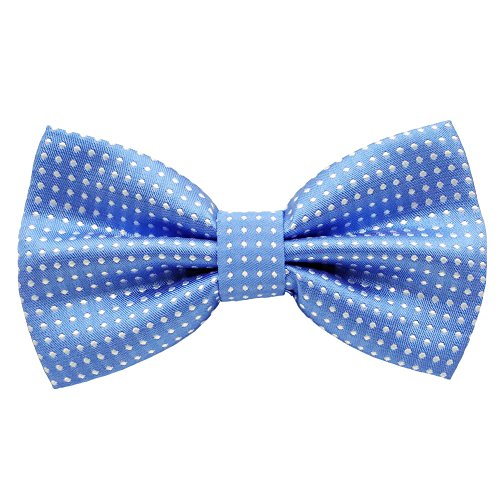


Recommended Product ASIN: B01NBNCPT8
Product Name: tiemart boy dark purpl turquois stripe bow tie
Product URL: https://www.amazon.in/TieMart-Boys-Purple-Turquoise-Striped/dp/B01NBNCPT8/
Similarity Score: 0.99


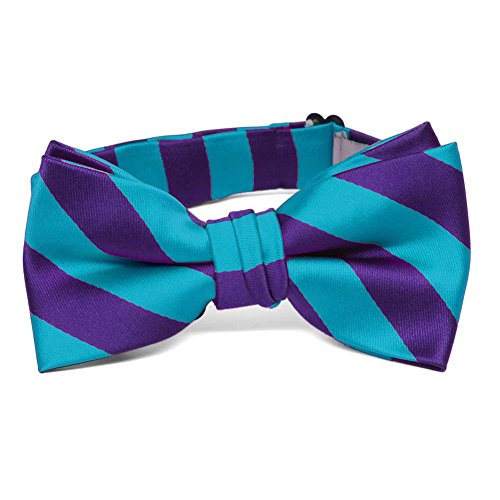


Recommended Product ASIN: B00IWMNIXE
Product Name: retreez preppi stripe pattern woven microfib preti boy bow tie maroon red navi blue 4 7 year
Product URL: https://www.amazon.in/Retreez-Preppy-Pattern-Microfiber-Pre-tied/dp/B00IWMNIXE/
Similarity Score: 0.99


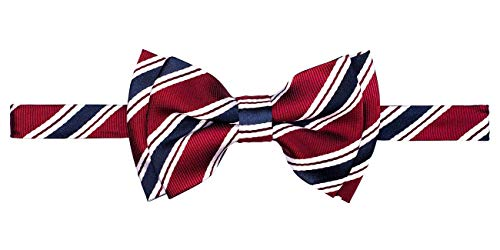


Recommended Product ASIN: B00FFBNCSQ
Product Name: retreez classic polka dot woven microfib preti bow tie 45 navi blue pink dot
Product URL: https://www.amazon.in/Retreez-Classic-Polka-Microfiber-Pre-tied/dp/B00FFBNCSQ/
Similarity Score: 0.99


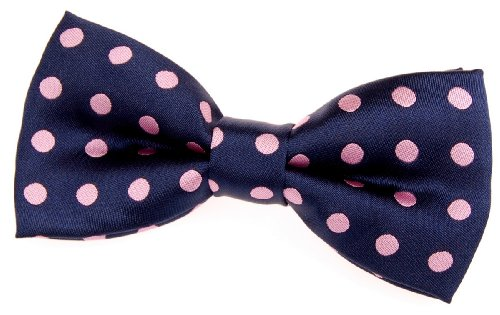

In [63]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from IPython.display import Image, display

# Sample DataFrame (replace this with your actual data)
# df_main = pd.read_csv("your_data.csv")  # Ensure this contains 'product_name', 'asin', etc.

# Function to compute TF-IDF scores and return as dictionary
def compute_tfidf_dict(tfidf_vectorizer, product_names):
    tfidf_matrix = tfidf_vectorizer.transform(product_names)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_dicts = []
    
    for i, product_name in enumerate(product_names):
        tfidf_scores = tfidf_matrix[i].toarray()[0]
        tfidf_dict = {word: tfidf_scores[idx] for idx, word in enumerate(feature_names) if word in product_name.split()}
        tfidf_dicts.append(tfidf_dict)
    
    return tfidf_dicts

# Function to compute weighted Word2Vec vectors using TF-IDF dictionary
def compute_weighted_word2vec(w2v_model, tfidf_dicts, product_names):
    weighted_vectors = []
    for tfidf_dict, product_name in zip(tfidf_dicts, product_names):
        words = product_name.split()
        weighted_vector = np.zeros(w2v_model.vector_size)
        total_weight = 0.0
        
        for word in words:
            if word in w2v_model.wv and word in tfidf_dict:
                weight = tfidf_dict[word]
                weighted_vector += weight * w2v_model.wv[word]
                total_weight += weight
        
        # Normalize by total weight if applicable
        if total_weight > 0:
            weighted_vector /= total_weight
        
        weighted_vectors.append(weighted_vector)
    
    return np.array(weighted_vectors)

# Train Word2Vec model
sentences = [product_name.split() for product_name in df_main['product_name']]
w2v_model = Word2Vec(sentences, vector_size=100, min_count=1)

# Train TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(df_main['product_name'])

# Compute TF-IDF dictionaries
tfidf_dicts = compute_tfidf_dict(tfidf_vectorizer, df_main['product_name'])

# Compute weighted Word2Vec vectors
weighted_vectors_w2v = compute_weighted_word2vec(w2v_model, tfidf_dicts, df_main['product_name'])

# Normalize weighted Word2Vec vectors
weighted_vectors_w2v = normalize(weighted_vectors_w2v, norm='l2')

# Function for product recommendation
def hybrid_recommendation_w2v_tfidf(asin, num_recommendations, vectors, df):
    if asin not in df['asin'].values:
        print(f"ASIN {asin} not found.")
        return []

    # Find the product index based on ASIN
    product_index = df[df['asin'] == asin].index[0]
    product_vector = vectors[product_index]

    # Compute cosine similarity
    cosine_sim = cosine_similarity([product_vector], vectors).flatten()

    # Get the indices of the most similar products
    similar_indices = np.argsort(cosine_sim)[::-1][1:num_recommendations + 1]

    # Print recommendations
    print(f"Recommendations for Product ASIN: {asin}")
    for idx in similar_indices:
        recommended_asin = df.iloc[idx]['asin']
        product_name = df.iloc[idx]['product_name']
        product_url = df.iloc[idx]['product_url']
        image_url = df.iloc[idx]['medium']
        similarity_score = cosine_sim[idx]
        print(f"\nRecommended Product ASIN: {recommended_asin}")
        print(f"Product Name: {product_name}")
        print(f"Product URL: {product_url}")
        print(f"Similarity Score: {similarity_score:.2f}")
        try:
            display(Image(image_url))
        except Exception as e:
            print(f"Error displaying image for ASIN {recommended_asin}: {e}")

# Example usage
asin = 'B07PJ5QWZ3'  # Replace with an actual ASIN
num_recommendations = 4
hybrid_recommendation_w2v_tfidf(asin, num_recommendations, weighted_vectors_w2v, df_main)


### recommendation based on brand

In [59]:
import numpy as np
import pandas as pd
import gensim
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, Image

# Function to train and save the Word2Vec model
def train_word2vec_model(texts, vector_size=100, window=5, min_count=1):
    tokenized_texts = [text.split() for text in texts]
    model = gensim.models.Word2Vec(tokenized_texts, vector_size=vector_size, window=window, min_count=min_count)
    model.save("word2vec.model")
    return model

# Train the Word2Vec model using product names from df_main
product_names = df_main['product_name'].tolist()
w2v_model = train_word2vec_model(product_names)

# Load the trained Word2Vec model (optional if you want to reload it)
w2v_model = gensim.models.Word2Vec.load("word2vec.model")

# Mock clustering labels (you would typically generate this using a clustering algorithm)
cluster_labels = np.random.randint(0, 5, size=len(df_main))  # Random clusters for demonstration

# Function to recommend products
def recommend_products_with_brand_weight_w2v(asin, num_recommendations, df, cluster_labels, brand_weight=1.5, w2v_model=None):
    if asin not in df['asin'].values:
        print(f"ASIN {asin} not found.")
        return []

    product_index = df[df['asin'] == asin].index[0]
    selected_brand = df.iloc[product_index]['brand']
    selected_cluster = cluster_labels[product_index]
    query_name = df.iloc[product_index]['product_name']

    # Get Word2Vec vector for the query product
    query_vector = np.mean([w2v_model.wv[word] for word in query_name.split() if word in w2v_model.wv], axis=0)
    
    if query_vector is None or np.isnan(query_vector).any():
        print("Query vector could not be computed.")
        return []

    # Filter products in the same cluster
    same_cluster_indices = np.where(cluster_labels == selected_cluster)[0]
    same_cluster = df.iloc[same_cluster_indices].copy()

    # Filter products by brand
    same_brand_products = same_cluster[same_cluster['brand'] == selected_brand].copy()

    # If no products from the same brand are found in the cluster, fall back to all products in that cluster
    if same_brand_products.empty:
        print(f"No products found from brand {selected_brand} in the same cluster.")
        same_brand_products = same_cluster.copy()

    same_cluster_vectors = []
    
    for name in same_brand_products['product_name']:
        product_vector = np.mean([w2v_model.wv[word] for word in name.split() if word in w2v_model.wv], axis=0)
        if product_vector is None or np.isnan(product_vector).any():
            product_vector = np.zeros(w2v_model.vector_size)
        same_cluster_vectors.append(product_vector)

    same_cluster_vectors = np.array(same_cluster_vectors)
    
    if same_cluster_vectors.size == 0:
        print("No valid vectors found in the same cluster.")
        return []

    # Compute cosine similarity with products in the same cluster
    similarities = cosine_similarity(query_vector.reshape(1, -1), same_cluster_vectors).flatten()

    # Add brand prioritization using .loc to avoid SettingWithCopyWarning
    same_brand_products.loc[:, 'similarity'] = similarities[:len(same_brand_products)]
    same_brand_products.loc[:, 'brand_priority'] = brand_weight  # Give full weight to same-brand products
    
    # Calculate weighted similarity by multiplying similarity with brand priority
    same_brand_products.loc[:, 'weighted_similarity'] = (
        same_brand_products['similarity'] * same_brand_products['brand_priority']
    )

    # Sort by weighted similarity and get top recommendations
    recommendations = same_brand_products.sort_values(by='weighted_similarity', ascending=False).head(num_recommendations)

    print(f"Recommendations for ASIN: {asin} (Brand: {selected_brand})")
    
    for _, row in recommendations.iterrows():
        image_url = row.get('medium', '')  # Use the medium column for image URLs
        product_name = row['product_name']
        brand = row['brand']
        similarity = row['weighted_similarity']
        
        try:
            if image_url:
                display(Image(url=image_url))
            else:
                print("No image available.")
            print(f"Product Name: {product_name}\nBrand: {brand}\nSimilarity Score: {similarity:.2f}\n")
        except Exception as e:
            print(f"Error displaying image for ASIN {row['asin']}: {e}")

# Example usage
asin = 'B01D6VFN7O'  # Replace with an actual ASIN from your dataset
num_recommendations = 4

recommend_products_with_brand_weight_w2v(asin, num_recommendations, df_main, cluster_labels, w2v_model=w2v_model)

Recommendations for ASIN: B01D6VFN7O (Brand: Peppermint)


Product Name: peppermint synthet dress
Brand: Peppermint
Similarity Score: 1.50



Product Name: peppermint synthet dress
Brand: Peppermint
Similarity Score: 1.50



Product Name: peppermint synthet dress
Brand: Peppermint
Similarity Score: 1.50



Product Name: peppermint girl alin maxi dress
Brand: Peppermint
Similarity Score: 1.44



In [60]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [64]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm
import os
from PIL import Image as PILImage
import matplotlib.pyplot as plt


In [65]:
import requests
import os

# Create a directory to save images
os.makedirs('images', exist_ok=True)

def download_images(urls, save_path='images'):
    for idx, url in enumerate(urls):
        response = requests.get(url)
        if response.status_code == 200:
            with open(f"{save_path}/image_{idx}.jpg", 'wb') as f:
                f.write(response.content)

# Extract image URLs from the `medium` column
image_urls = [url.split('|')[0] for url in df_main['medium'].head(50)]
download_images(image_urls)


In [66]:
# Load ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.trainable = False
model = tf.keras.models.Sequential([model, GlobalMaxPool2D()])


In [67]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result / norm(result)
    return norm_result



In [68]:
filenames = [f'images/{file}' for file in os.listdir('images') if not file.startswith('.')]
image_features = [extract_features_from_images(file, model) for file in filenames]


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [69]:
pkl.dump(image_features, open('image_features.pkl', 'wb'))
pkl.dump(filenames, open('filenames.pkl', 'wb'))


In [70]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')
neighbors.fit(image_features)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [71]:
def recommend(image_path, model, neighbors, filenames):
    input_features = extract_features_from_images(image_path, model)
    distances, indices = neighbors.kneighbors([input_features])

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 6, 1)
    img = PILImage.open(image_path)
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis('off')

    for i, idx in enumerate(indices[0]):
        plt.subplot(1, 6, i+2)
        img = PILImage.open(filenames[idx])
        plt.imshow(img)
        plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


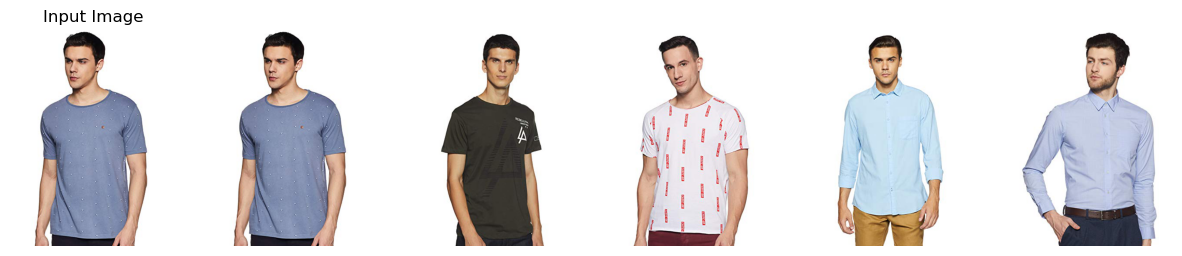

In [72]:
recommend('images/image_1.jpg', model, neighbors, filenames)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


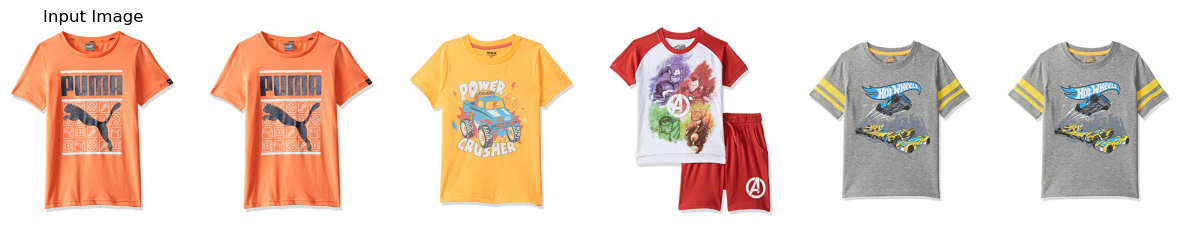

In [73]:
recommend('images/image_10.jpg', model, neighbors, filenames)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


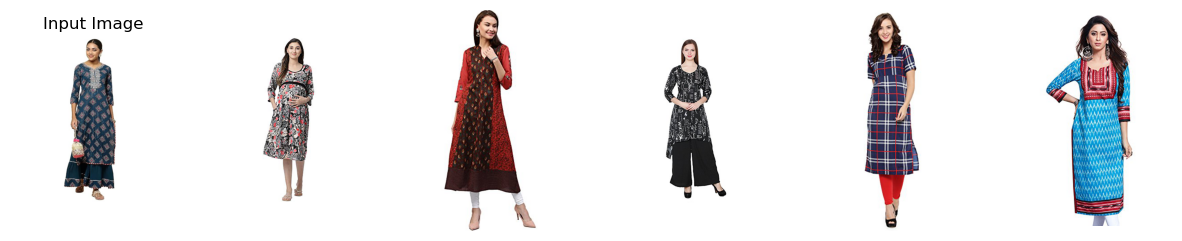

In [74]:
recommend('Sharara.jpg', model, neighbors, filenames)

In [75]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, HTML
import requests
from io import BytesIO
from PIL import Image
import json

# Assuming df_main is already available with the columns: 'asin', 'product_url', 'product_name', 'sales_price', 'rating', 'meta_keywords', 'medium', 'brand'
# If needed, replace `df_main` with the actual dataframe variable

# Example: You can replace this with your df_main loaded earlier
df = df_main[['asin', 'medium', 'product_name']]  # Use relevant columns for recommendation

# Use the first 50 products for simplicity (you can adjust this based on the dataset size)
df = df.head(50)

# Download and preprocess images
def preprocess_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    img = img.resize((224, 224))  # Resize for VGG16
    img_array = img_to_array(img)
    return preprocess_input(img_array)

image_features = []
valid_asins = []
image_arrays = []

# Load VGG16 model for feature extraction
vgg16_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

# Extract features and store raw images for training
for _, row in df.iterrows():
    try:
        img_array = preprocess_image(row['medium'])
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        features = vgg16_model.predict(img_array)
        image_features.append(features.flatten())
        image_arrays.append(img_array[0])  # Keep the raw image data
        valid_asins.append(row['asin'])
    except Exception as e:
        print(f"Error processing image for ASIN {row['asin']}: {e}")

# Prepare data for training
image_features = np.array(image_features)
image_arrays = np.array(image_arrays)
num_classes = len(valid_asins)

# Define a Sequential model to work with the flattened features
model = Sequential([
    Input(shape=(512,)),  # Adjusted input to match VGG16 output features
    Dense(256, activation='relu'),  # Fully connected layer
    Dense(128, activation='relu'),
    Dense(50, activation='softmax')  # Output layer for classification (50 products)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (10 epochs)
print("Training the model...")
labels = np.arange(len(valid_asins))  # Generate dummy labels for training
model.fit(image_features, labels, epochs=10, batch_size=8)


# Recommendation function
def recommend_similar_images(asin, num_recommendations):
    """
    Recommend similar images based on ASIN using image similarity.
    
    Parameters:
        asin (str): The ASIN ID of the product to find recommendations for.
        num_recommendations (int): Number of similar recommendations to return.
    """
    if asin not in valid_asins:
        print(f"ASIN {asin} not found in the dataset.")
        return
    
    # Get the index of the ASIN in the dataset
    asin_index = valid_asins.index(asin)
    query_features = image_features[asin_index].reshape(1, -1)

    # Compute similarity scores with all images
    similarity_scores = cosine_similarity(query_features, image_features).flatten()
    
    # Exclude the given ASIN and get the most similar ASINs
    similar_indices = np.argsort(similarity_scores)[::-1]  # Sort in descending order
    similar_asins = [valid_asins[i] for i in similar_indices if valid_asins[i] != asin][:num_recommendations]
    similar_scores = [similarity_scores[i] for i in similar_indices if valid_asins[i] != asin][:num_recommendations]

    # Get the queried product details
    queried_product = df[df['asin'] == asin].iloc[0]
    queried_image = queried_product['medium']
    queried_name = queried_product['product_name']

    # HTML and CSS for better alignment
    html_content = f"""
    <style>
        .container {{
            display: flex;
            flex-direction: column;
            align-items: center;
            font-family: Arial, sans-serif;
        }}
        .queried-product, .recommendation {{
            border: 1px solid #ddd;
            border-radius: 10px;
            margin: 10px;
            padding: 15px;
            text-align: center;
            box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);
            max-width: 200px;
        }}
        .product-container {{
            display: flex;
            justify-content: center;
            gap: 20px;
            flex-wrap: wrap;
        }}
        img {{
            border-radius: 10px;
            width: 150px;
            height: 150px;
            object-fit: cover;
            margin-bottom: 10px;
        }}
        h3 {{
            text-align: center;
            color: #333;
        }}
    </style>
    <div class="container">
        <h3>Queried Product</h3>
        <div class="queried-product">
            <img src="{queried_image}" alt="{asin}">
            <strong>ASIN:</strong> {asin}<br>
            <strong>Product Name:</strong> {queried_name}
        </div>
        <h3>Recommended Products</h3>
        <div class="product-container">
    """
    
    for similar_asin, score in zip(similar_asins, similar_scores):
        product = df[df['asin'] == similar_asin].iloc[0]
        product_image = product['medium']
        product_name = product['product_name']
        html_content += f"""
        <div class="recommendation">
            <img src="{product_image}" alt="{similar_asin}">
            <strong>ASIN:</strong> {similar_asin}<br>
            <strong>Product Name:</strong> {product_name}<br>
            <strong>Similarity Score:</strong> {score:.2f}
        </div>
        """
    html_content += "</div></div>"

    # Display the results in an HTML format
    display(HTML(html_content))



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [76]:
example_asin = "B083Q45SS7"  # Enter your desired ASIN ID here
num_recommendations = 3       # Set the number of recommendations to display
recommend_similar_images(example_asin, num_recommendations)

In [77]:
def recommend_similar_images_from_path(image_path, num_recommendations):
    """
    Recommend similar images based on an input image file.
    
    Parameters:
        image_path (str): Path to the input image.
        num_recommendations (int): Number of similar recommendations to return.
    """
    try:
        # Preprocess the input image
        img = Image.open(image_path).convert('RGB')
        img = img.resize((224, 224))  # Resize for VGG16
        img_array = img_to_array(img)
        img_array = preprocess_input(np.expand_dims(img_array, axis=0))  # Add batch dimension
        
        # Extract features using VGG16
        query_features = vgg16_model.predict(img_array).flatten().reshape(1, -1)
    except Exception as e:
        print(f"Error processing the input image: {e}")
        return
    
    # Compute similarity scores with all dataset images
    similarity_scores = cosine_similarity(query_features, image_features).flatten()
    
    # Get the most similar ASINs
    similar_indices = np.argsort(similarity_scores)[::-1][:num_recommendations]  # Top recommendations
    similar_asins = [valid_asins[i] for i in similar_indices]
    similar_scores = [similarity_scores[i] for i in similar_indices]

    # HTML and CSS for better alignment
    html_content = f"""
    <style>
        .container {{
            display: flex;
            flex-direction: column;
            align-items: center;
            font-family: Arial, sans-serif;
        }}
        .queried-product, .recommendation {{
            border: 1px solid #ddd;
            border-radius: 10px;
            margin: 10px;
            padding: 15px;
            text-align: center;
            box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);
            max-width: 200px;
        }}
        .product-container {{
            display: flex;
            justify-content: center;
            gap: 20px;
            flex-wrap: wrap;
        }}
        img {{
            border-radius: 10px;
            width: 150px;
            height: 150px;
            object-fit: cover;
            margin-bottom: 10px;
        }}
        h3 {{
            text-align: center;
            color: #333;
        }}
    </style>
    <div class="container">
        <h3>Input Image</h3>
        <div class="queried-product">
            <img src="{image_path}" alt="Input Image">
        </div>
        <h3>Recommended Products</h3>
        <div class="product-container">
    """
    
    for similar_asin, score in zip(similar_asins, similar_scores):
        product = df[df['asin'] == similar_asin].iloc[0]
        product_image = product['medium']
        product_name = product['product_name']
        html_content += f"""
        <div class="recommendation">
            <img src="{product_image}" alt="{similar_asin}">
            <b>ASIN:</b> {similar_asin}<br>
            <strong>Product Name:</strong> {product_name}<br>
            <strong>Similarity Score:</strong> {score:.2f}
        </div>
        """
    html_content += "</div></div>"

    # Display the results in an HTML format
    display(HTML(html_content))


In [78]:
input_image_path = "./images/image_1.jpg"
num_recommendations = 4  # Number of recommendations
recommend_similar_images_from_path(input_image_path, num_recommendations)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


In [79]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, HTML
import requests
from io import BytesIO
from PIL import Image
import json

# Assuming df_main is already available with the columns: 'asin', 'product_url', 'product_name', 'sales_price', 'rating', 'meta_keywords', 'medium', 'brand'
# If needed, replace `df_main` with the actual dataframe variable

# Example: You can replace this with your df_main loaded earlier
df = df_main[['asin', 'medium', 'product_name']]  # Use relevant columns for recommendation

# Use the first 50 products for simplicity (you can adjust this based on the dataset size)
df = df.head(50)

# Download and preprocess images
def preprocess_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    img = img.resize((224, 224))  # Resize for VGG16
    img_array = img_to_array(img)
    return preprocess_input(img_array)

image_features = []
valid_asins = []
image_arrays = []

# Load VGG16 model for feature extraction
vgg16_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

# Extract features and store raw images for training
for _, row in df.iterrows():
    try:
        img_array = preprocess_image(row['medium'])
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        features = vgg16_model.predict(img_array)
        image_features.append(features.flatten())
        image_arrays.append(img_array[0])  # Keep the raw image data
        valid_asins.append(row['asin'])
    except Exception as e:
        print(f"Error processing image for ASIN {row['asin']}: {e}")

# Prepare data for training
image_features = np.array(image_features)
image_arrays = np.array(image_arrays)
num_classes = len(valid_asins)

# Define a Sequential model to work with the flattened features
model = Sequential([
    Input(shape=(512,)),  # Adjusted input to match VGG16 output features
    Dense(256, activation='relu'),  # Fully connected layer
    Dense(128, activation='relu'),
    Dense(50, activation='softmax')  # Output layer for classification (50 products)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (10 epochs)
print("Training the model...")
labels = np.arange(len(valid_asins))  # Generate dummy labels for training
model.fit(image_features, labels, epochs=10, batch_size=8)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [80]:
def recommend_similar_images_from_path(image_path, num_recommendations):
    """
    Recommend similar images based on an input image file.
    
    Parameters:
        image_path (str): Path to the input image.
        num_recommendations (int): Number of similar recommendations to return.
    """
    try:
        # Preprocess the input image
        img = Image.open(image_path).convert('RGB')
        img = img.resize((224, 224))  # Resize for VGG16
        img_array = img_to_array(img)
        img_array = preprocess_input(np.expand_dims(img_array, axis=0))  # Add batch dimension
        
        # Extract features using VGG16
        query_features = vgg16_model.predict(img_array).flatten().reshape(1, -1)
    except Exception as e:
        print(f"Error processing the input image: {e}")
        return
    
    # Compute similarity scores with all dataset images
    similarity_scores = cosine_similarity(query_features, image_features).flatten()
    
    # Get the most similar ASINs
    similar_indices = np.argsort(similarity_scores)[::-1][:num_recommendations]  # Top recommendations
    similar_asins = [valid_asins[i] for i in similar_indices]
    similar_scores = [similarity_scores[i] for i in similar_indices]

    # Prepare HTML content without styles for better alignment
    html_content = f"""
    <div>
        <h3>Input Image</h3>
        <div>
            <img src="{image_path}" alt="Input Image">
        </div>
        <h3>Recommended Products</h3>
    <div>
    """
    
    for similar_asin, score in zip(similar_asins, similar_scores):
        product = df[df['asin'] == similar_asin].iloc[0]
        product_image = product['medium']
        product_name = product['product_name']
        html_content += f"""
        <div>
            <img src="{product_image}" alt="{similar_asin}">
            <strong>ASIN:</strong> {similar_asin}<br>
            <strong>Product Name:</strong> {product_name}<br>
            <strong>Similarity Score:</strong> {score:.2f}
        </div>
        """
    html_content += "</div></div>"

    # Display the results in an HTML format
    display(HTML(html_content))


In [81]:
input_image_path = "./images/image_1.jpg"
num_recommendations = 5  # Number of recommendations
recommend_similar_images_from_path(input_image_path, num_recommendations)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


In [82]:
df_main['brand'].head(30)

0             LA' Facon
1               Unknown
2               LOVISTA
3               Unknown
5           Forest Club
6          PrintOctopus
7               Unknown
8              Carahere
9            Peppermint
10      Haase Unlimited
11              Unknown
12          Jevi Prints
13                 OLLI
14              Unknown
15           Miss Chase
16                 bebe
17    Colt by Unlimited
18              Unknown
19                   C9
20                PuJoy
21       Winza Designer
22     kalpit creations
23               Pooplu
24                JORKK
25           nauti nati
27               Vimlon
29           GOLDSTROMS
31           Pari Singh
33                TEXCO
34        DHRUVI TRENDZ
Name: brand, dtype: object

In [83]:
import pandas as pd

# Sample DataFrame structure (for context)
# df_main = pd.DataFrame({
#     'product_name': ['sf jean pantaloon men\'s plain slim fit t-shirt', 'another product', ...],
#     'brand': ['BrandA', 'BrandB', ...]
# })

# Define the product name to search for
product_name_to_search = "texco pink side draw string crop top"

# Find the brand associated with the specified product name
brand_count = df_main[df_main['product_name'] == product_name_to_search]['brand'].value_counts()

if not brand_count.empty:
    brand = brand_count.index[0]  # Get the brand name
    count_in_brand = df_main[df_main['brand'] == brand].shape[0]  # Count items in that brand

    print(f"Brand: {brand}")
    print(f"Number of items in '{brand}': {count_in_brand}")
else:
    print("Product not found.")

Brand: TEXCO
Number of items in 'TEXCO': 20


In [84]:
import pandas as pd

# Sample DataFrame structure (for context)
# df_main = pd.DataFrame({
#     'product_name': ['sf jean pantaloon men\'s plain slim fit t-shirt', 'another product', ...],
#     'brand': ['BrandA', 'Max', ...]
# })

# Define the brand to search for
brand_to_search = "TEXCO"

# Find all product names associated with the specified brand
max_brand_products = df_main[df_main['brand'] == brand_to_search]['product_name']

if not max_brand_products.empty:
    print(f"Product names under the '{brand_to_search}' brand:")
    for product_name in max_brand_products:
        print(product_name)
else:
    print(f"No products found for the brand '{brand_to_search}'.")


Product names under the 'TEXCO' brand:
texco pink side draw string crop top
texco winter cotton polyst fleec hood jacket
texco shoulder women crop top
texco red stud embelish turtl neck full sleev women sweatshirt
texco front slit maroon long women maxi dress
texco solid one shoulder sleeveless women dress
texco jumpsuit women
texco lace stripe maxi top women
texco multicolor print rayon scoop neck ruffl women dress
texco digon stripe neck detail maxi dress
texco revers women shirt dress
texco stripe maxi dress women
texco stripe side slit maxi dress women
texco women 's cotton dress belt accessori blue white xs
texco poli creap long dress women 's
texco high slit back women maxi dress
texco embroid scoop neck ruffl women dress
texco cotton polyst fleec winter hood multicolor jacket
texco women 's black pink lilac dress
texco white fashion neck women t-shirt


In [85]:
# Filter for "GOLDSTROMS" brand
goldstroms_products = df_main[df_main['brand'] == 'TEXCO']

# Extract ASINs for the "GOLDSTROMS" brand
goldstroms_asins = goldstroms_products['asin'].tolist()

# Display the ASINs
print("ASINs for 'TEXCO' brand:")
print(goldstroms_asins)


ASINs for 'TEXCO' brand:
['B075T5GYKN', 'B018KABTZQ', 'B07NSXN5DT', 'B01N63J8XG', 'B07FQQ1M9C', 'B07CVHPTH2', 'B07M7D9YPB', 'B07MHM94SB', 'B07CVJLBC5', 'B01JCQXCV6', 'B07NWLHX5L', 'B07ML6872L', 'B07NRNJ97Z', 'B01II08Y38', 'B012FIDJCK', 'B01EJRJ5NW', 'B07CVJJ5QB', 'B01N0L6YIY', 'B017P0P34U', 'B00X7S6ETI']


In [86]:
from sklearn.metrics import pairwise_distances
import numpy as np
from gensim.models import Word2Vec
from IPython.display import Image, display

# Function to compute combined vectors for product names and brands
def compute_combined_vectors(model, product_names, brands):
    combined_vectors = []
    for name, brand in zip(product_names, brands):
        combined_text = f"{name} {brand}"
        words = combined_text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            combined_vectors.append(np.mean(word_vectors, axis=0))
        else:
            combined_vectors.append(np.zeros(model.vector_size))
    return np.array(combined_vectors)

# Train the Word2Vec model
sentences = [f"{name} {brand}".split() for name, brand in zip(df_main['product_name'], df_main['brand'])]
model = Word2Vec(sentences, vector_size=100, min_count=1)

# Compute combined vectors
product_vectors = compute_combined_vectors(model, df_main['product_name'], df_main['brand'])

In [87]:
def recommend_products(asin, num_recommendations, product_vectors, df, weight_similarity=0.7, weight_rating=0.3):
    if asin not in df['asin'].values:
        print(f"ASIN {asin} not found.")
        return []

    # Get the input product's details
    input_product = df[df['asin'] == asin].iloc[0]
    input_brand = input_product['brand']
    input_image_url = input_product['medium']
    
    # Display the input product image
    print(f"Input Product ASIN: {asin}")
    print(f"Product Name: {input_product['product_name']}")
    print(f"Brand: {input_brand}")
    print(f"Rating: {input_product['rating']}")
    display(Image(input_image_url))

    # Filter products by the same brand
    brand_filtered_df = df[df['brand'] == input_brand]
    brand_filtered_indices = brand_filtered_df.index.tolist()  # Get the original indices as a list

    # Map DataFrame indices to product_vectors indices
    mapped_indices = [i for i in brand_filtered_indices if i < len(product_vectors)]

    # Get index of the input product
    product_index = df[df['asin'] == asin].index[0]
    product_vector = product_vectors[product_index]
    
    # Extract relevant vectors for the filtered products
    filtered_vectors = product_vectors[mapped_indices]

    # Compute cosine distances and similarity scores
    distances = pairwise_distances([product_vector], filtered_vectors, metric='cosine').flatten()
    similarity_scores = 1 - distances  # Convert distances to similarity scores

    # Combine similarity scores with ratings
    ratings = brand_filtered_df.loc[mapped_indices, 'rating'].fillna(0).to_numpy()
    combined_scores = (weight_similarity * similarity_scores) + (weight_rating * ratings / 5)

    # Get top recommendations based on combined scores
    sorted_indices = np.argsort(-combined_scores)  # Sort in descending order
    top_indices = sorted_indices[:num_recommendations]

    print(f"\nRecommendations for Product ASIN: {asin}")
    
    for idx in top_indices:
        # Map back to the original DataFrame rows
        original_index = mapped_indices[idx]
        recommended_asin = brand_filtered_df.loc[original_index, 'asin']
        product_name = brand_filtered_df.loc[original_index, 'product_name']
        product_url = brand_filtered_df.loc[original_index, 'product_url']
        image_url = brand_filtered_df.loc[original_index, 'medium']
        rating = brand_filtered_df.loc[original_index, 'rating']
        combined_score = combined_scores[idx]
        
        print(f"\nRecommended Product ASIN: {recommended_asin}")
        print(f"Product Name: {product_name}")
        print(f"Brand: {input_brand}")
        print(f"Rating: {rating}")
        print(f"Product URL: {product_url}")
        print(f"Combined Score: {combined_score:.2f}")
        
        try:
            display(Image(image_url))
        except Exception as e:
            print(f"Error displaying image for ASIN {recommended_asin}: {e}")


Input Product ASIN: B075T5GYKN
Product Name: texco pink side draw string crop top
Brand: TEXCO
Rating: 3.0


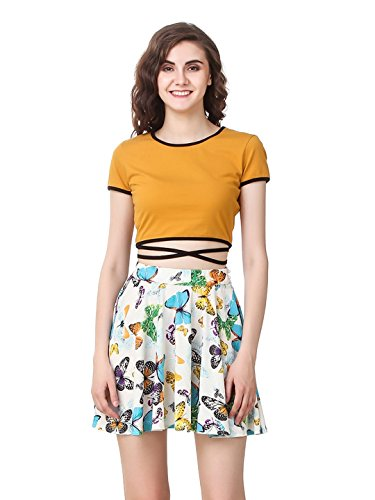


Recommendations for Product ASIN: B075T5GYKN

Recommended Product ASIN: B07ML6872L
Product Name: texco stripe maxi dress women
Brand: TEXCO
Rating: 5.0
Product URL: https://www.amazon.in/TEXCO-Black-White-Striped-Dress/dp/B07MKNVBWF/
Combined Score: 0.98


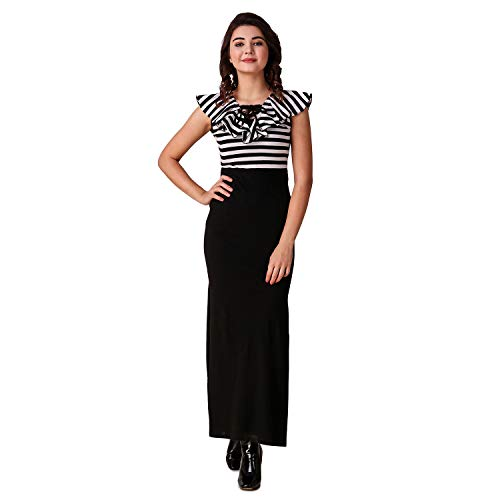


Recommended Product ASIN: B07NWLHX5L
Product Name: texco revers women shirt dress
Brand: TEXCO
Rating: 5.0
Product URL: https://www.amazon.in/TEXCO-Burgundy-Reversible-Women-Shirt/dp/B07NWMVV8Y/
Combined Score: 0.97


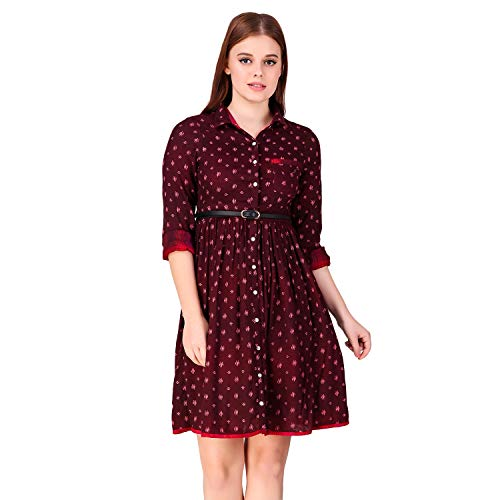


Recommended Product ASIN: B01II08Y38
Product Name: texco women 's cotton dress belt accessori blue white xs
Brand: TEXCO
Rating: 5.0
Product URL: https://www.amazon.in/TEXCO-Womens-Cotton-Dress-White/dp/B01II08Y38/
Combined Score: 0.94


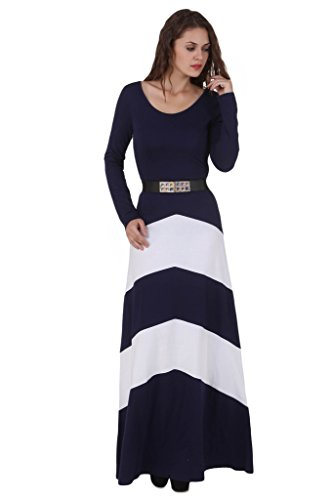


Recommended Product ASIN: B075T5GYKN
Product Name: texco pink side draw string crop top
Brand: TEXCO
Rating: 3.0
Product URL: https://www.amazon.in/TEXCO-Mustard-Yellow-Strings-Women/dp/B075T4JV75/
Combined Score: 0.88


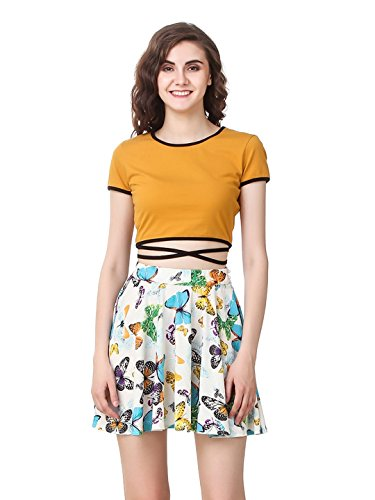


Recommended Product ASIN: B01N0L6YIY
Product Name: texco cotton polyst fleec winter hood multicolor jacket
Brand: TEXCO
Rating: 4.1
Product URL: https://www.amazon.in/TEXCO-Cotton-Polyster-Fleece-Multicolor/dp/B017IHWO1U/
Combined Score: 0.86


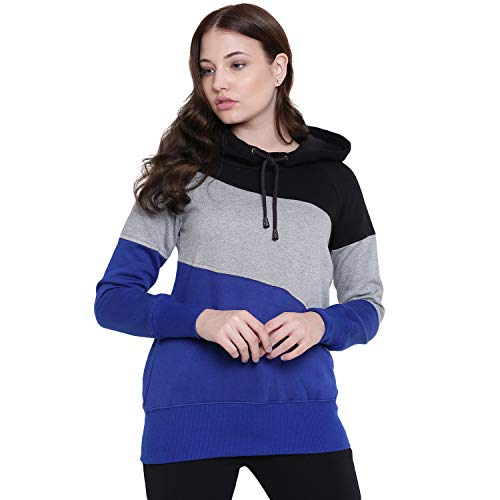


Recommended Product ASIN: B01JCQXCV6
Product Name: texco digon stripe neck detail maxi dress
Brand: TEXCO
Rating: 5.0
Product URL: https://www.amazon.in/TEXCO-Fashion-Digonal-Striped-Detailing/dp/B01JCQXUPE/
Combined Score: 0.84


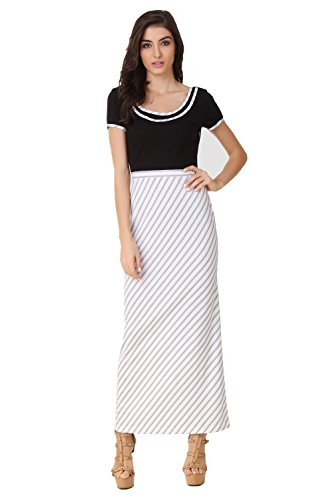


Recommended Product ASIN: B01N63J8XG
Product Name: texco red stud embelish turtl neck full sleev women sweatshirt
Brand: TEXCO
Rating: 4.6
Product URL: https://www.amazon.in/TEXCO-Embelished-Turtle-Sleeve-Sweatshirt/dp/B01N74VI8N/
Combined Score: 0.83


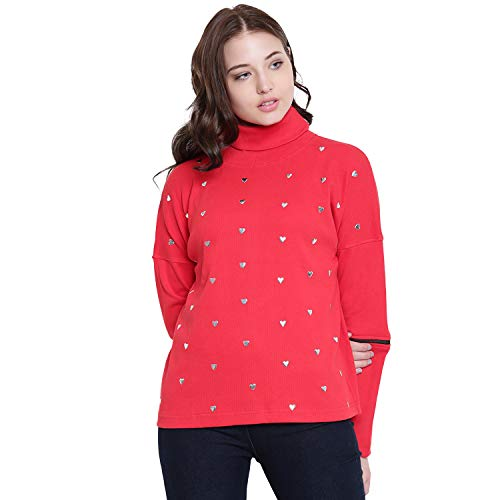


Recommended Product ASIN: B012FIDJCK
Product Name: texco poli creap long dress women 's
Brand: TEXCO
Rating: 5.0
Product URL: https://www.amazon.in/TEXCO-Poly-Creap-Women-Dress/dp/B012FIDJCK/
Combined Score: 0.77


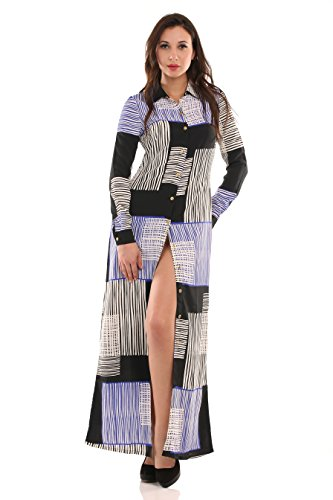


Recommended Product ASIN: B07MHM94SB
Product Name: texco lace stripe maxi top women
Brand: TEXCO
Rating: 3.9
Product URL: https://www.amazon.in/TEXCO-Womens-Striped-White-Large/dp/B07M6PSD4B/
Combined Score: 0.72


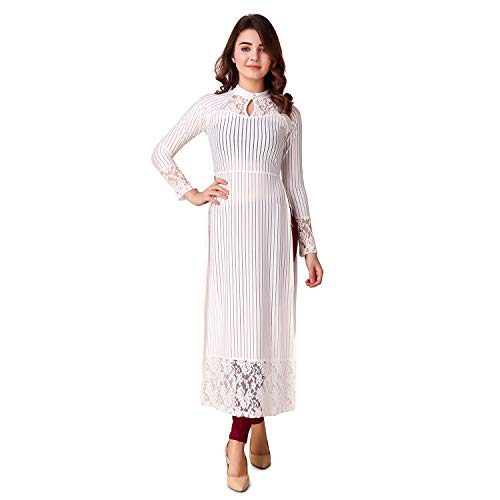


Recommended Product ASIN: B07FQQ1M9C
Product Name: texco front slit maroon long women maxi dress
Brand: TEXCO
Rating: 4.6
Product URL: https://www.amazon.in/TEXCO-Front-Maroon-Women-Dress/dp/B01II083ZC/
Combined Score: 0.71


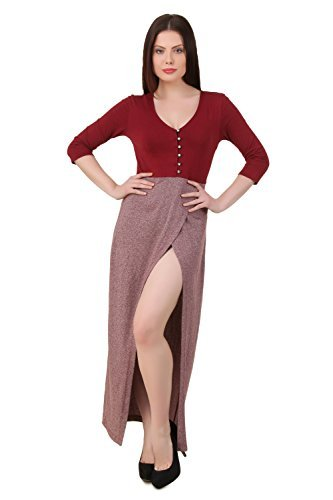

In [89]:
asin = 'B075T5GYKN'
num_recommendations = 10
recommend_products(asin, num_recommendations, product_vectors, df_main)